# Center of Mass / Centroid distance

Where "in" groeps are 10 AA that are toward the cytplasm side of the protein and "out" groups are 10 amino acids towards the periplasm.

```text
Available static index groups:
Group 0  [TM1_in]
Group 1  [TM1_out]
Group 2  [TM2_in]
Group 3  [TM2_out]
Group 4  [TM5_in]
Group 5  [TM5_out]
Group 6  [TM7_in]
Group 7  [TM7_out]
Group 8  [TM8_in]
Group 9  [TM8_out]
Group 10 [TM11_in]
Group 11 [TM11_out]
```

## 4ZW9 gromacs distance calculations

In [ ]:
%%bash
bash calc_distance_4zw9.sh

## 5EQI gromacs distance calculations



In [ ]:
%%bash
bash calc_distance_5eqi.sh

# Plots

## Load all distances

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

ylim_offset = 0.75

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new


dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")
label_names = dir_names
names = dict(zip(dir_names, label_names))
    

distance_dataset = []
for protein in dir_names:
    structure = protein[0:4]
    for j, item in enumerate(["TM1_TM7_in", "TM1_TM7_out", "TM5_TM11_in", "TM5_TM11_in","TM5_TM11_out", "TM2_TM8_in", "TM2_TM8_out"]):
    # for j, item in enumerate(["TM5_TM11_in", "TM5_TM11_out", "TM1_TM7_in", "TM1_TM7_out", "TM2_TM8_in", "TM2_TM8_out", "TM2_TM11_in", "TM2_TM11_out", "TM5_TM8_in", "TM5_TM8_out", "TM2_TM3_in", "TM2_TM3_out", "TM8_TM9_in", "TM8_TM9_out" ]):
        for i in range(1):
            path = f"distances/{structure}/" + f"{protein}_{item}_rep{i+1}.com.xvg"
            if not os.path.isfile(path):
                print(f"{path} not found. Continue.")
                continue
            
            try:
                x, y = np.loadtxt(path, comments=["@", "#"], unpack=True)
                x = subset(x, 100)
                y = subset(y, 100)

                for x_item, y_item in zip(x, y):
                    distance_dataset.append({"protein"  : protein,
                                            "structure": structure,
                                            "rep"      : str(i+1),
                                            "tm"       : item,
                                            "time"     : x_item,
                                            "distance" : y_item,
                                            })
                print(f"Loading {path}")
            except:
                pass
                # print(f"Could not correctly load: {path}")

distance_dataset_df = pd.DataFrame(distance_dataset)

distance_dataset_df = pd.pivot_table(distance_dataset_df, index=["protein", "structure", "rep", "time"], columns="tm", values="distance").reset_index()
distance_dataset_df['protein_rep'] = distance_dataset_df['protein'] + "_" + distance_dataset_df['rep']
distance_dataset_df


Loading distances/4zw9/4zw9_TM1_TM7_in_rep1.com.xvg
Loading distances/4zw9/4zw9_TM1_TM7_out_rep1.com.xvg
Loading distances/4zw9/4zw9_TM5_TM11_in_rep1.com.xvg
Loading distances/4zw9/4zw9_TM5_TM11_in_rep1.com.xvg
Loading distances/4zw9/4zw9_TM5_TM11_out_rep1.com.xvg
Loading distances/4zw9/4zw9_TM2_TM8_in_rep1.com.xvg
Loading distances/4zw9/4zw9_TM2_TM8_out_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM1_TM7_in_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM1_TM7_out_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM5_TM11_in_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM5_TM11_in_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM5_TM11_out_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM2_TM8_in_rep1.com.xvg
Loading distances/4zw9/4zw9_asp89_TM2_TM8_out_rep1.com.xvg
Loading distances/4zw9/4zw9_trp331_TM1_TM7_in_rep1.com.xvg
Loading distances/4zw9/4zw9_trp331_TM1_TM7_out_rep1.com.xvg
Loading distances/4zw9/4zw9_trp331_TM5_TM11_in_rep1.com.xvg
Loading distances/4zw9/4zw9_trp331_TM5_

tm         protein structure rep        time  TM1_TM7_in  TM1_TM7_out  \
0             4zw9      4zw9   1         0.0       2.912        1.906   
1             4zw9      4zw9   1     20000.0       2.858        1.921   
2             4zw9      4zw9   1     40000.0       2.925        1.910   
3             4zw9      4zw9   1     60000.0       2.903        1.937   
4             4zw9      4zw9   1     80000.0       2.856        1.974   
...            ...       ...  ..         ...         ...          ...   
13334  5eqi_trp333      5eqi   1  44260000.0       2.901        1.868   
13335  5eqi_trp333      5eqi   1  44280000.0       2.983        1.887   
13336  5eqi_trp333      5eqi   1  44300000.0       2.916        1.927   
13337  5eqi_trp333      5eqi   1  44320000.0       2.896        1.987   
13338  5eqi_trp333      5eqi   1  44340000.0       2.892        1.958   

tm     TM2_TM8_in  TM2_TM8_out  TM5_TM11_in  TM5_TM11_out    protein_rep  
0           2.904        2.409        1.838         2.595         4zw9_1  
1           3.081        2.341        1.823         2.525         4zw9_1  
2           3.006        2.369        1.817         2.562         4zw9_1  
3           2.890        2.231        1.889         2.549         4zw9_1  
4           3.059        2.411        1.768         2.456         4zw9_1  
...           ...          ...          ...           ...            ...  
13334       2.916        2.078        1.796         2.388  5eqi_trp333_1  
13335       2.922        2.101        1.742         2.410  5eqi_trp333_1  
13336       2.913        2.095        1.786         2.385  5eqi_trp333_1  
13337       2.964        2.109        1.785         2.415  5eqi_trp333_1  
13338       2.878        2.189        1.778         2.378  5eqi_trp333_1  

[13339 rows x 11 columns]

In [45]:
distance_dataset_df['variant'] = distance_dataset_df['protein']
distance_dataset_df.loc[distance_dataset_df['protein'] == "4zw9_asp89", "variant"] = "G91D"
distance_dataset_df.loc[distance_dataset_df['protein'] == "5eqi_asp91", "variant"] = "G91D"
distance_dataset_df.loc[distance_dataset_df['protein'] == "4zw9_trp331", "variant"] = "R333W"
distance_dataset_df.loc[distance_dataset_df['protein'] == "5eqi_trp333", "variant"] = "R333W"

In [46]:
def pretty_name(x):
    if x == "4zw9":
        return "GLUT3 (wildtype)"
    if x == "4zw9_trp331":
        return "GLUT3 (R331W)"
    if x == "4zw9_asp89":
        return "GLUT3 (G89D)"
    if x == "5eqi":
        return "GLUT1 (wildtype)"
    if x == "5eqi_trp333":
        return "GLUT1 (R333W)"
    if x == "5eqi_asp91":
        return "GLUT1 (G91D)"
    return x
distance_dataset_df['name'] = distance_dataset_df['protein'].apply(pretty_name)


In [47]:
initial_df = pd.read_csv("init_distances.txt", sep="\t")
initial_df.head()

protein             description  distance
0    5eqi   cg_crystal_TM1_TM7_in     3.551
1    5eqi  cg_crystal_TM1_TM7_out     1.907
2    5eqi   cg_crystal_TM2_TM8_in     2.936
3    5eqi  cg_crystal_TM2_TM8_out     2.407
4    5eqi  cg_crystal_TM5_TM11_in     2.075

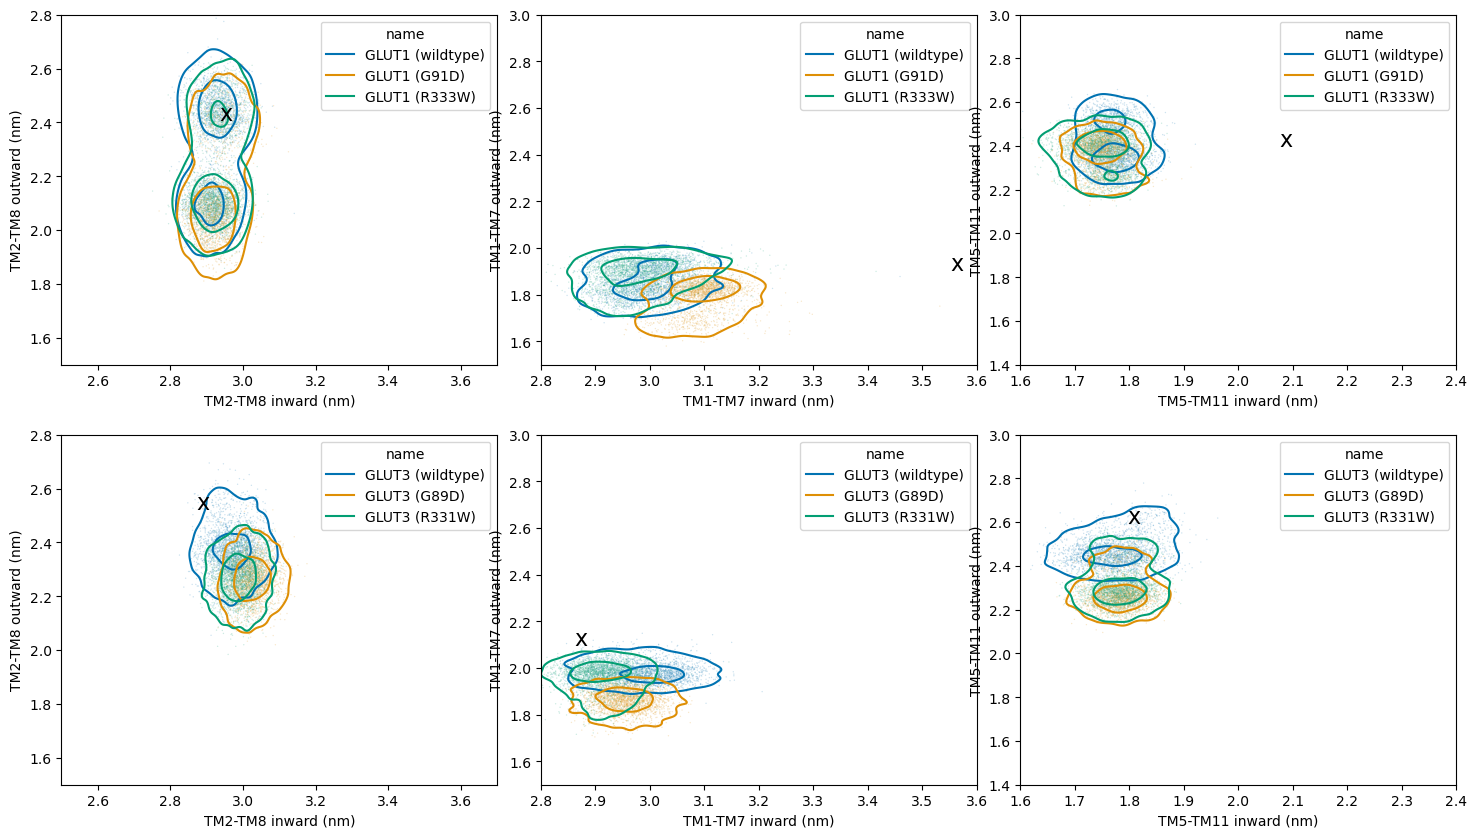

In [48]:
import seaborn as sns
sns.set_palette(palette='colorblind')
plt.rcParams["figure.figsize"] = (18, 10)
fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1) 

############## 5eqi
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
for i, distance in enumerate(["TM2_TM8", "TM1_TM7", "TM5_TM11"]):
    x_text = initial_df.loc[(initial_df['protein'] == "5eqi") & (initial_df['description'] == f"cg_crystal_{distance}_in")]['distance'].iloc[0]
    y_text = initial_df.loc[(initial_df['protein'] == "5eqi") & (initial_df['description'] == f"cg_crystal_{distance}_out")]['distance'].iloc[0]
    sns.scatterplot(data=test, x=f"{distance}_in",  y=f"{distance}_out",  hue="name", ax=axs[0][i], s=1, alpha=0.2)
    sns.kdeplot(data=test, x=f"{distance}_in",  y=f"{distance}_out",  hue="name", ax=axs[0][i], levels=3) 
    axs[0][i].text(x_text, y_text, "x", fontsize=16)
    
    # Labels and limits:
    axs[0][i].set_xlabel(f"{distance.replace("_", "-")} inward (nm)")           
    axs[0][i].set_ylabel(f"{distance.replace("_", "-")} outward (nm)")
    if distance == "TM2_TM8":
        axs[0][i].set_xlim((2.5, 3.7))           
        axs[0][i].set_ylim((1.5, 2.8))          
    elif distance == "TM1_TM7":
        axs[0][i].set_xlim((2.8, 3.6))           
        axs[0][i].set_ylim((1.5, 3.0))          
    elif distance == "TM5_TM11":
        axs[0][i].set_xlim((1.6, 2.4))           
        axs[0][i].set_ylim((1.4, 3))          
        

############## 4zw9

test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
for i, distance in enumerate(["TM2_TM8", "TM1_TM7", "TM5_TM11"]):
    x_text = initial_df.loc[(initial_df['protein'] == "4zw9") & (initial_df['description'] == f"cg_crystal_{distance}_in")]['distance'].iloc[0]
    y_text = initial_df.loc[(initial_df['protein'] == "4zw9") & (initial_df['description'] == f"cg_crystal_{distance}_out")]['distance'].iloc[0]
    sns.scatterplot(data=test, x=f"{distance}_in",  y=f"{distance}_out",  hue="name", ax=axs[1][i], s=1, alpha=0.2)
    sns.kdeplot(data=test, x=f"{distance}_in",  y=f"{distance}_out",  hue="name", ax=axs[1][i], levels=3)
    axs[1][i].text(x_text, y_text, "x", fontsize=16)
    
    # Labels and limits:
    axs[1][i].set_xlabel(f"{distance.replace("_", "-")} inward (nm)")           
    axs[1][i].set_ylabel(f"{distance.replace("_", "-")} outward (nm)")
    if distance == "TM2_TM8":
        axs[1][i].set_xlim((2.5, 3.7))           
        axs[1][i].set_ylim((1.5, 2.8))          
    elif distance == "TM1_TM7":
        axs[1][i].set_xlim((2.8, 3.6))           
        axs[1][i].set_ylim((1.5, 3.0))          
    elif distance == "TM5_TM11":
        axs[1][i].set_xlim((1.6, 2.4))           
        axs[1][i].set_ylim((1.4, 3))  

# Potverdikkie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

initial_df = pd.read_csv("initial_distances.tsv", sep="\t")

# names = dict(zip(dir_names, label_names))

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

distance_data_df = pd.DataFrame()
for protein in "4zw9/4zw9 4zw9/4zw9_asp89 4zw9/4zw9_trp331 5eqi/5eqi 5eqi/5eqi_asp91 5eqi/5eqi_trp333".split(" "):
    # Collect data from all replicates and distances:
    for j, item in enumerate([["TM5_TM11_in", "TM5_TM11_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM2_TM8_in", "TM2_TM8_out"]]):
        for rep in [1,2,3]:
            path1 = f"distances/{protein}_{item[0]}_rep{rep}.com.xvg"
            path2 = f"distances/{protein}_{item[1]}_rep{rep}.com.xvg"
            if not os.path.isfile(path1):
                print(f"Not found: {path1}")
                continue

            res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
            y1 = subset(res[1], 100)
            # y1 = res[1][0:20]
            res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
            # y2 = res[1][0:20]
            y2 = subset(res[1], 100)

            data = {
                    "path": protein,
                    "item" : item[0] +  "_" + item[1], 
                    "replicate" : f"rep {rep}",
                    "x" : y1, 
                    "y" : y2, 
                    }
            distance_data_df = pd.concat([distance_data_df, pd.DataFrame(data)])

def pretty_name(x):
    if x == "4zw9":
        return "GLUT3 (wildtype)"
    if x == "4zw9_trp331":
        return "GLUT3 (R331W)"
    if x == "4zw9_asp89":
        return "GLUT3 (G89D)"
    if x == "5eqi":
        return "GLUT1 (wildtype)"
    if x == "5eqi_trp333":
        return "GLUT1 (R333W)"
    if x == "5eqi_asp91":
        return "GLUT1 (G91D)"
    return x

distance_data_df['structure'] = distance_data_df['path'].apply(lambda x: x.split("/")[0])
distance_data_df['protein'] = distance_data_df['path'].apply(lambda x: x.split("/")[1])
distance_data_df['name'] = distance_data_df['protein'].apply(pretty_name)

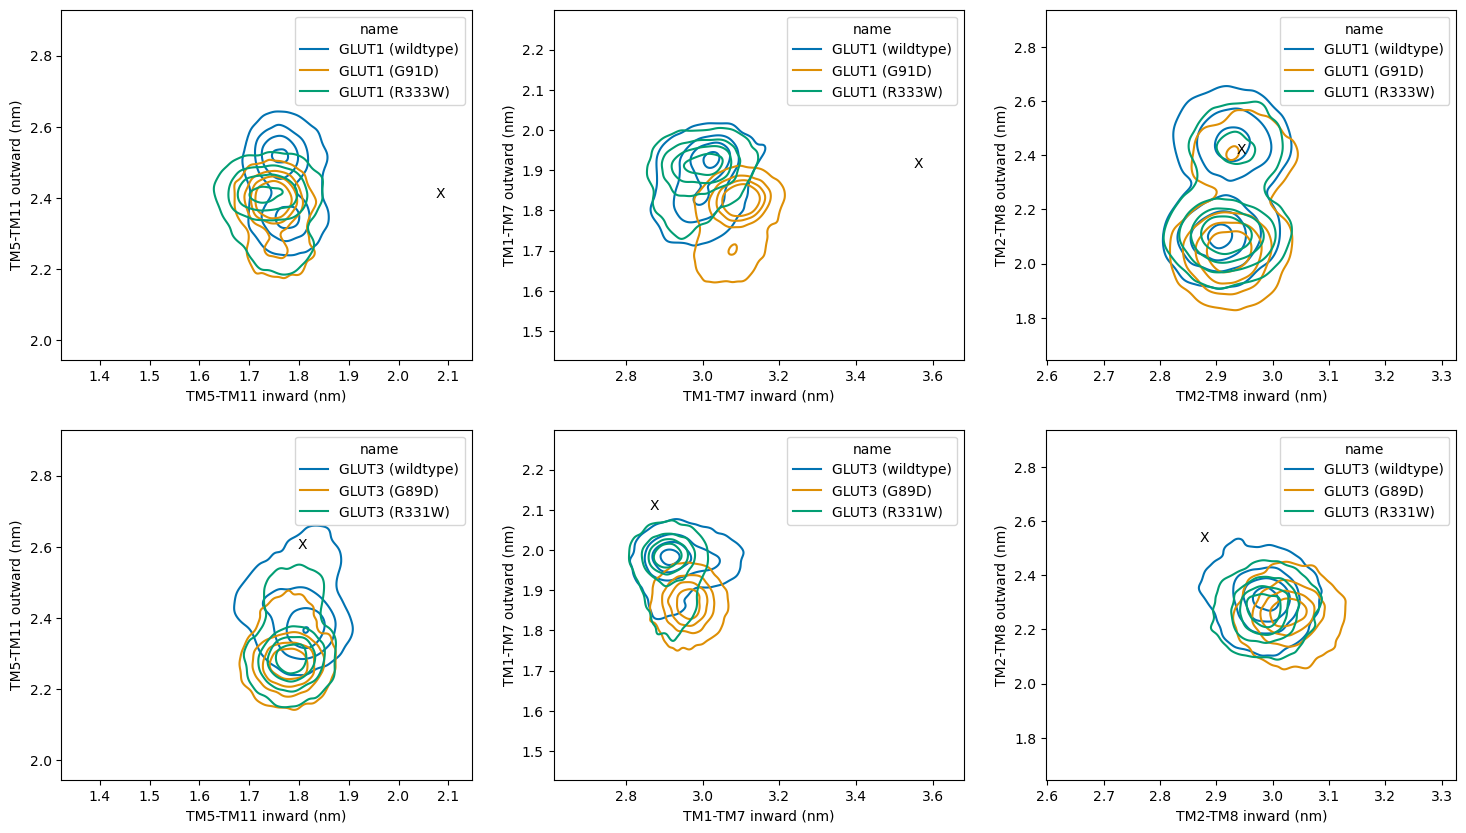

In [39]:
import seaborn as sns
sns.set_palette(palette='colorblind')
plt.rcParams["figure.figsize"] = (18, 10)
fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2) 

############## 5eqi
for i, distance in enumerate(['TM5_TM11_in_TM5_TM11_out', 'TM1_TM7_in_TM1_TM7_out', 'TM2_TM8_in_TM2_TM8_out']):
    title = "-".join(distance.split("_")[0:2])
    selection = distance_data_df[(distance_data_df['structure'] == "5eqi") & (distance_data_df['item'] == distance)]
    selection2 = distance_data_df[(distance_data_df['item'] == distance)]

    prefix = "_".join(distance.split("_")[0:2])
    x_text = initial_df.loc[(initial_df['protein'] == "5eqi") & (initial_df['description'] == f"cg_crystal_{prefix}_in")]['distance'].iloc[0]
    y_text = initial_df.loc[(initial_df['protein'] == "5eqi") & (initial_df['description'] == f"cg_crystal_{prefix}_out")]['distance'].iloc[0]
    
    # sns.scatterplot(data=selection, x="x",  y="y",  hue="name", ax=axs[0][i], s=1, alpha=0.2)
    # sns.scatterplot(data=selection, x="x",  y="y",  hue="name", ax=axs[0][i])
    sns.kdeplot(data=selection, x="x",  y="y",  hue="name", ax=axs[0][i], levels=5)
    
    # Labels and limits:
    axs[0][i].set_xlabel(f"{title} inward (nm)")           
    axs[0][i].set_ylabel(f"{title} outward (nm)")
    axs[0][i].set_xlim((min(selection2['x'])-0.15, max(selection2['x'])+0.15))
    axs[0][i].set_ylim((min(selection2['y'])-0.15, max(selection2['y'])+0.15))
    axs[0][i].text(x=x_text, y=y_text, s="X", color="black")


############## 4zw9
for i, distance in enumerate(['TM5_TM11_in_TM5_TM11_out', 'TM1_TM7_in_TM1_TM7_out', 'TM2_TM8_in_TM2_TM8_out']):
    title = "-".join(distance.split("_")[0:2])
    selection = distance_data_df[(distance_data_df['structure'] == "4zw9") & (distance_data_df['item'] == distance)]
    selection2 = distance_data_df[(distance_data_df['item'] == distance)]

    prefix = "_".join(distance.split("_")[0:2])
    x_text = initial_df.loc[(initial_df['protein'] == "4zw9") & (initial_df['description'] == f"cg_crystal_{prefix}_in")]['distance'].iloc[0]
    y_text = initial_df.loc[(initial_df['protein'] == "4zw9") & (initial_df['description'] == f"cg_crystal_{prefix}_out")]['distance'].iloc[0]

    # sns.scatterplot(data=selection, x="x",  y="y",  hue="name", ax=axs[1][i])
    axs[1][i].text(x=x_text, y=y_text, s="X", color="black")

    sns.kdeplot(data=selection, x="x",  y="y",  hue="name", ax=axs[1][i], levels=5)
    
    # Labels and limits:
    axs[1][i].set_xlim((min(selection2['x'])-0.15, max(selection2['x'])+0.15))
    axs[1][i].set_ylim((min(selection2['y'])-0.15, max(selection2['y'])+0.15))
    axs[1][i].set_xlabel(f"{title} inward (nm)")           
    axs[1][i].set_ylabel(f"{title} outward (nm)")

# Other stuff

<Figure size 1500x400 with 0 Axes>

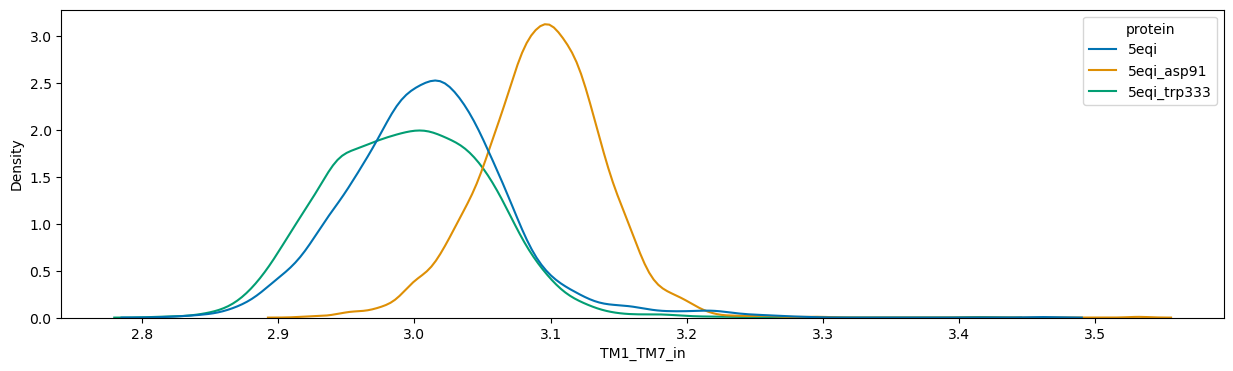

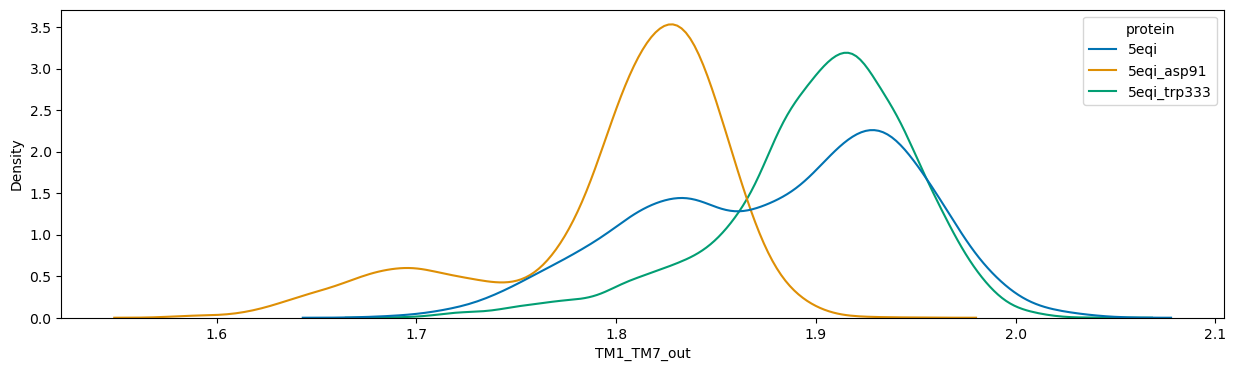

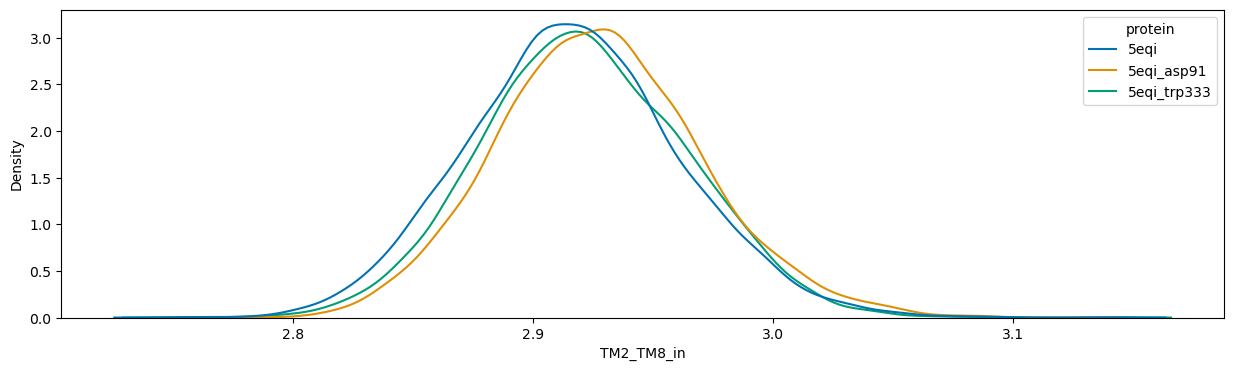

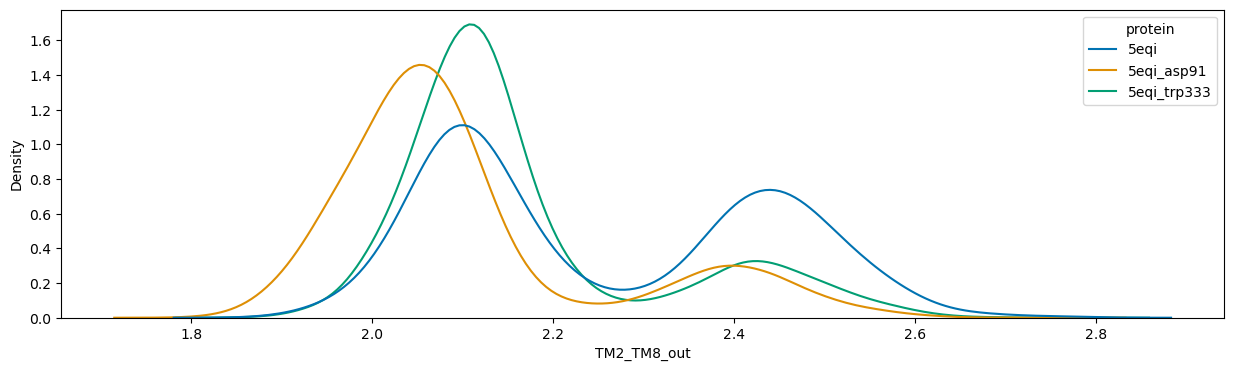

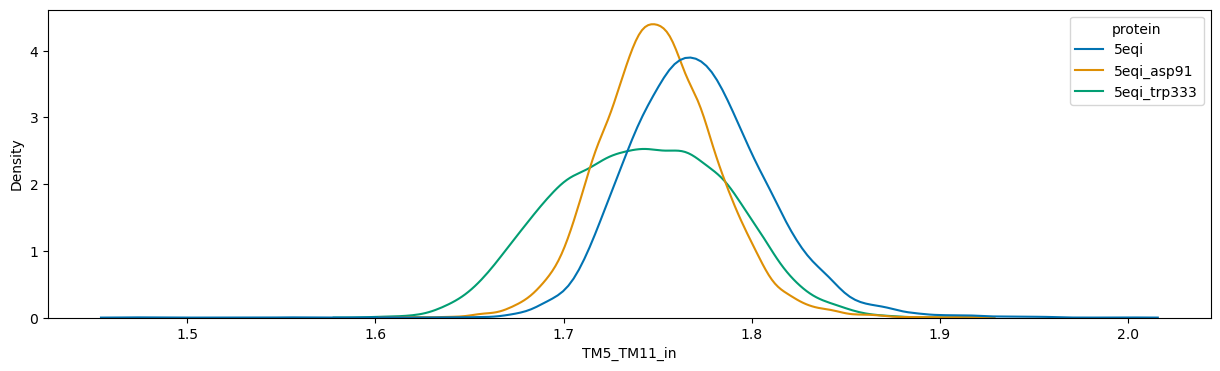

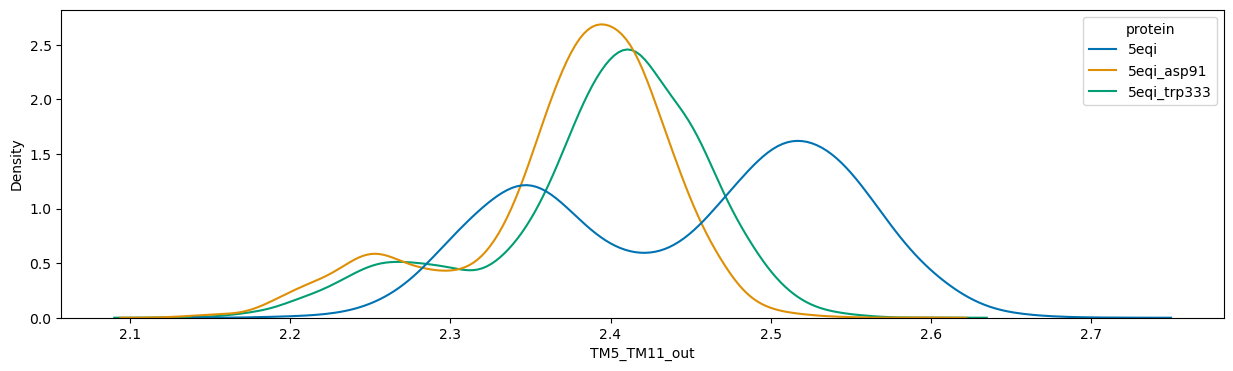

<Figure size 1500x400 with 0 Axes>

In [36]:
plt.rcParams["figure.figsize"] = (15, 4)
#
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM1_TM7_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM1_TM7_out", hue="protein")
plt.figure()
#
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM2_TM8_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM2_TM8_out", hue="protein")
plt.figure()
#
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM5_TM11_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM5_TM11_out", hue="protein")
plt.figure()



<Figure size 1500x400 with 0 Axes>

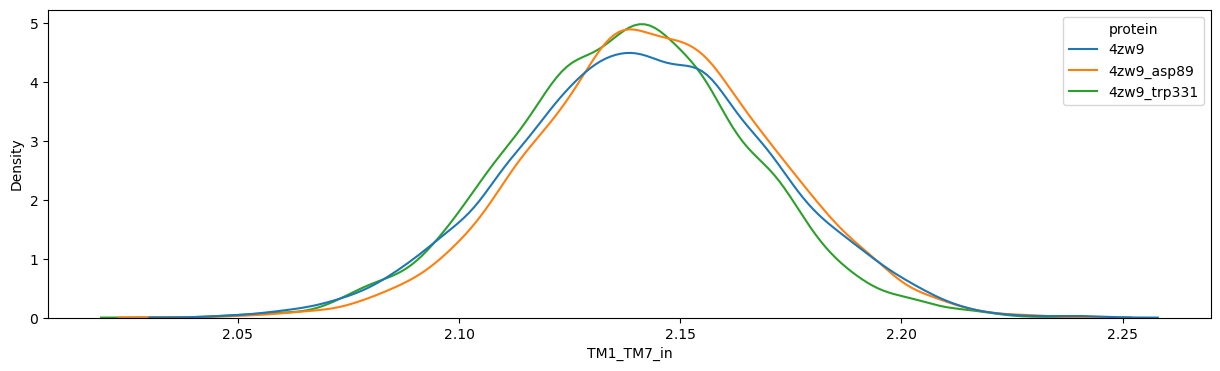

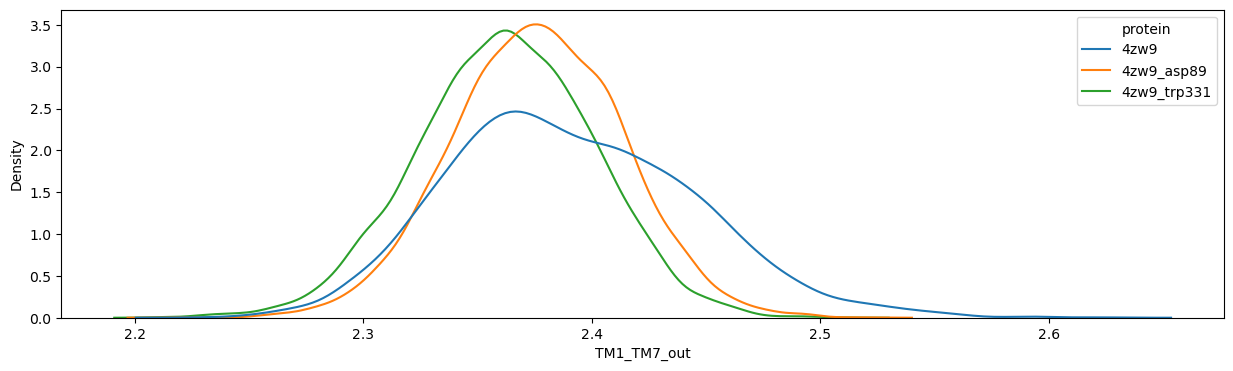

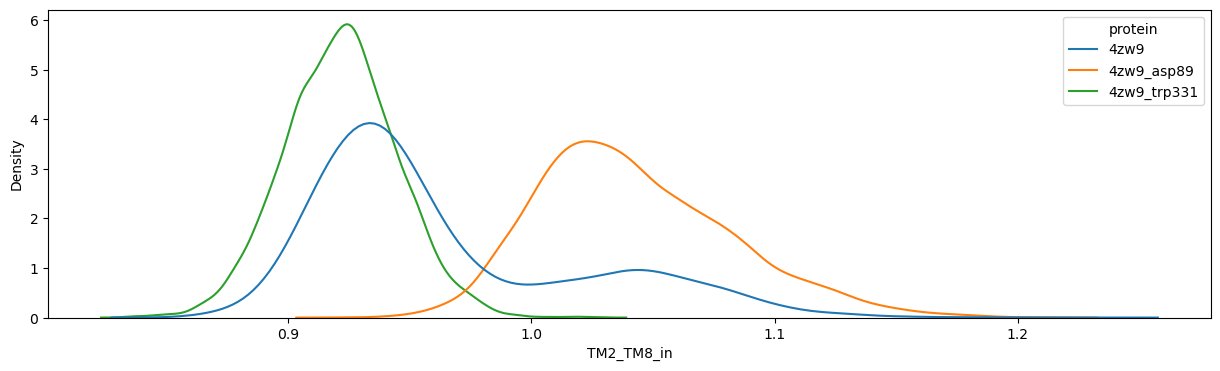

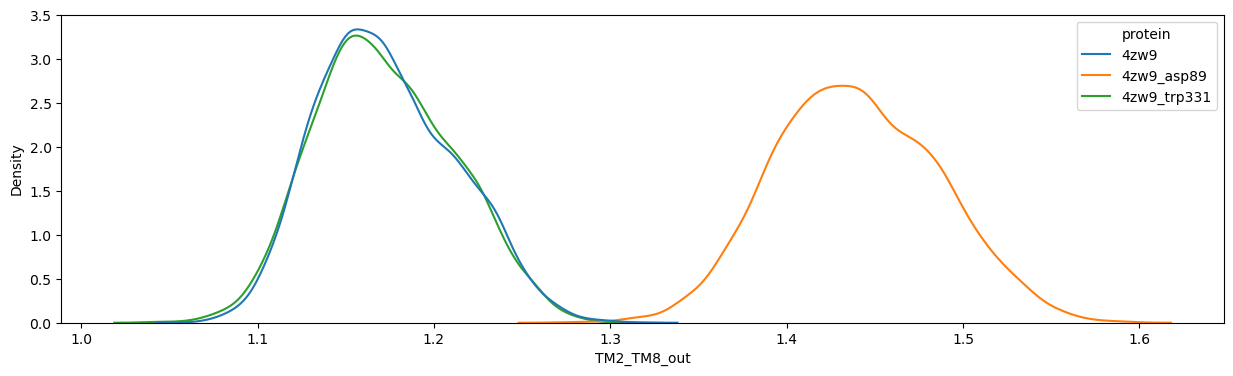

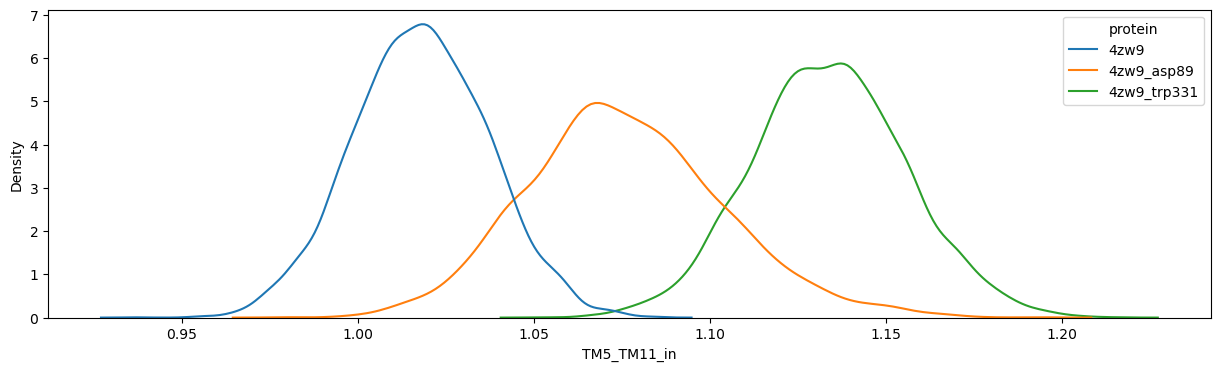

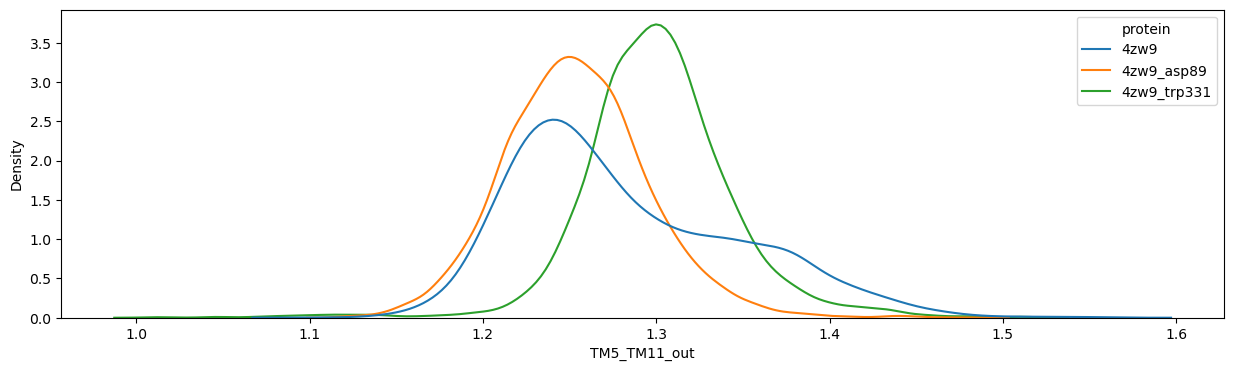

<Figure size 1500x400 with 0 Axes>

In [8]:
plt.rcParams["figure.figsize"] = (15, 4)
#
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM1_TM7_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM1_TM7_out", hue="protein")
plt.figure()
#
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM2_TM8_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM2_TM8_out", hue="protein")
plt.figure()
#
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM5_TM11_in", hue="protein")
plt.figure()
test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM5_TM11_out", hue="protein")
plt.figure()

In [31]:
distance_dataset_df['structure'].unique()

array(['4zw9', '5eqi'], dtype=object)

<Figure size 600x400 with 0 Axes>

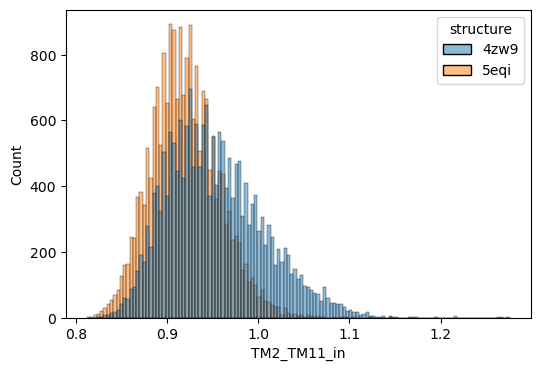

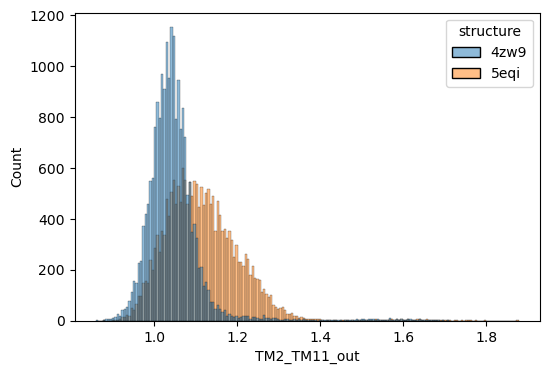

<Figure size 600x400 with 0 Axes>

In [19]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (6, 4)
#
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM1_TM7_in", hue="structure")
# plt.figure()
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM1_TM7_out", hue="structure")
# plt.figure()
# #
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM2_TM8_in", hue="structure")
# plt.figure()
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM2_TM8_out", hue="structure")
# plt.figure()
# #
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM5_TM11_in", hue="structure")
# plt.figure()
# test = distance_dataset_df
# sns.kdeplot(data=test, x="TM5_TM11_out", hue="structure")
# plt.figure()
test = distance_dataset_df
sns.histplot(data=test, x="TM2_TM11_in", hue="structure")
plt.figure()
test = distance_dataset_df
sns.histplot(data=test, x="TM2_TM11_out", hue="structure")
plt.figure()

# Distances I like
- TM2 TM8
- TM1 TM7


Text(0.5, 1.0, 'TM1 - TM7 inward')

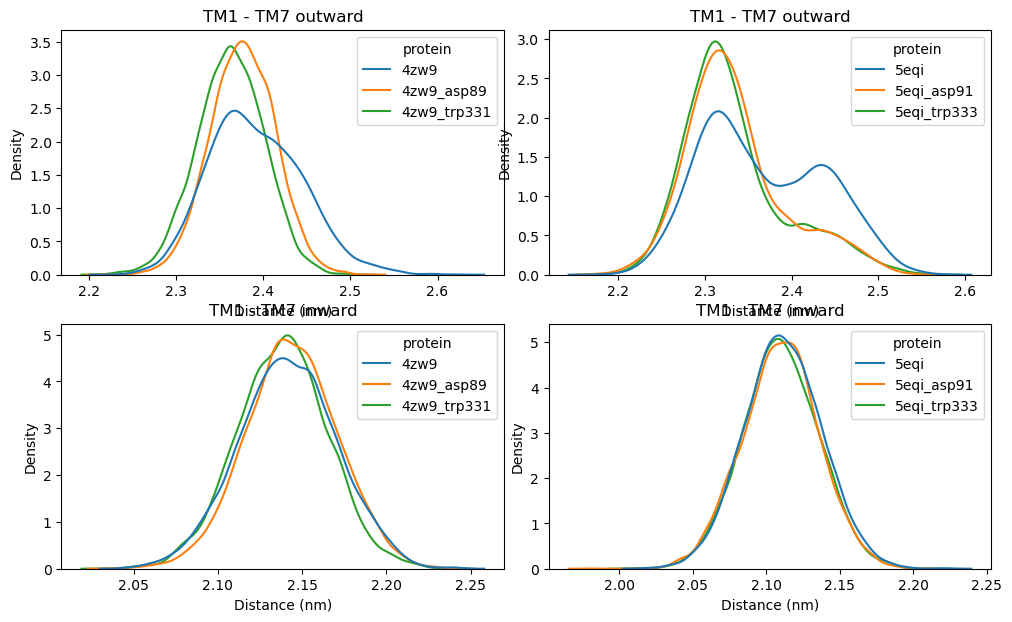

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams["figure.figsize"] = (12, 7)
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM1_TM7_out", hue="protein", ax=axs[0,0])
sns.kdeplot(data=test, x="TM1_TM7_in", hue="protein", ax=axs[1,0])

test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM1_TM7_out", hue="protein", ax=axs[0,1])
sns.kdeplot(data=test, x="TM1_TM7_in", hue="protein", ax=axs[1,1])

axs[0,0].set_xlabel("Distance (nm)")
axs[1,0].set_xlabel("Distance (nm)")
axs[0,1].set_xlabel("Distance (nm)")
axs[1,1].set_xlabel("Distance (nm)")
axs[0,0].set_title("TM1 - TM7 outward")
axs[1,0].set_title("TM1 - TM7 inward")
axs[0,1].set_title("TM1 - TM7 outward")
axs[1,1].set_title("TM1 - TM7 inward")


Text(0.5, 1.0, 'TM2 - TM11 outward')

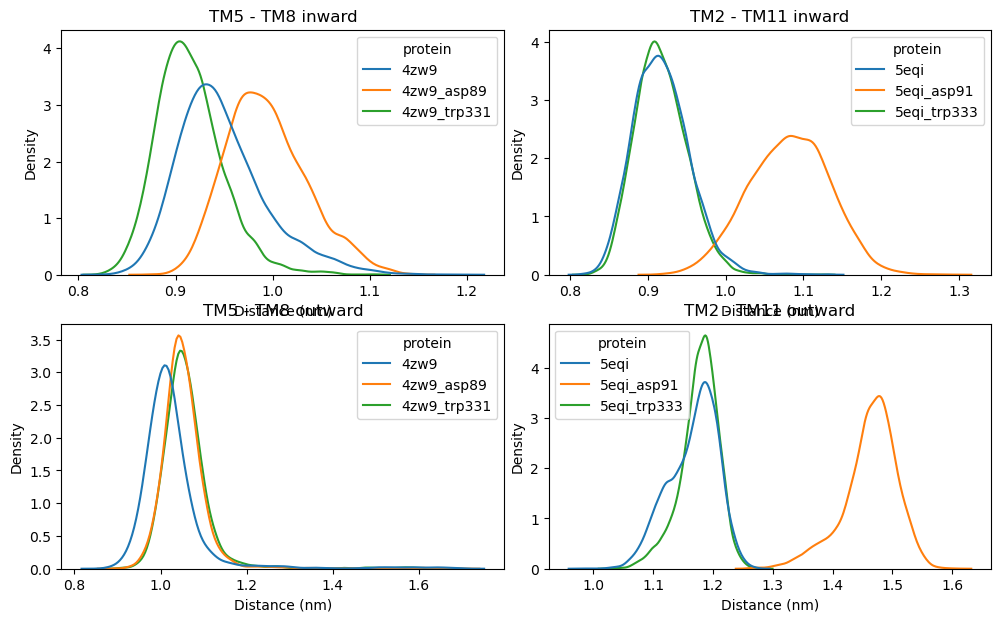

In [13]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 7)
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
sns.kdeplot(data=test, x="TM2_TM11_in", hue="protein", ax=axs[0,0])
sns.kdeplot(data=test, x="TM2_TM11_out", hue="protein", ax=axs[1,0])
test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
sns.kdeplot(data=test, x="TM5_TM8_in", hue="protein", ax=axs[0,1])
sns.kdeplot(data=test, x="TM5_TM8_out", hue="protein", ax=axs[1,1])

axs[0,0].set_xlabel("Distance (nm)")
axs[1,0].set_xlabel("Distance (nm)")
axs[0,1].set_xlabel("Distance (nm)")
axs[1,1].set_xlabel("Distance (nm)")
axs[0,0].set_title("TM5 - TM8 inward")
axs[1,0].set_title("TM5 - TM8 outward")
axs[0,1].set_title("TM2 - TM11 inward")
axs[1,1].set_title("TM2 - TM11 outward")

In [8]:
distance_dataset_df

tm         protein structure rep        time  TM1_TM7_in  TM1_TM7_out  \
0             4zw9      4zw9   1         0.0       2.157        2.479   
1             4zw9      4zw9   1     20000.0       2.144        2.409   
2             4zw9      4zw9   1     40000.0       2.118        2.435   
3             4zw9      4zw9   1     60000.0       2.122        2.378   
4             4zw9      4zw9   1     80000.0       2.130        2.436   
...            ...       ...  ..         ...         ...          ...   
40267  5eqi_trp333      5eqi   3  44000000.0       2.113        2.318   
40268  5eqi_trp333      5eqi   3  44020000.0       2.088        2.323   
40269  5eqi_trp333      5eqi   3  44040000.0       2.136        2.302   
40270  5eqi_trp333      5eqi   3  44060000.0       2.133        2.272   
40271  5eqi_trp333      5eqi   3  44080000.0       2.085        2.275   

tm     TM2_TM11_in  TM2_TM11_out  TM2_TM8_in  TM2_TM8_out  TM5_TM11_in  \
0            0.876         1.659       0.898        1.107        1.009   
1            0.988         1.286       0.954        1.201        1.007   
2            0.955         1.238       0.952        1.208        1.020   
3            0.896         1.171       0.892        1.221        1.030   
4            0.979         1.382       0.974        1.270        1.023   
...            ...           ...         ...          ...          ...   
40267        0.880         1.157       2.561        2.665        1.120   
40268        0.917         1.201       2.566        2.647        1.149   
40269        0.916         1.058       2.554        2.633        1.143   
40270        0.897         1.192       2.465        2.699        1.136   
40271        0.870         1.112       2.521        2.701        1.147   

tm     TM5_TM11_out  TM5_TM8_in  TM5_TM8_out    protein_rep  
0             1.394       0.898        1.107         4zw9_1  
1             1.408       0.954        1.201         4zw9_1  
2             1.317       0.952        1.208         4zw9_1  
3             1.289       0.892        1.221         4zw9_1  
4             1.231       0.974        1.270         4zw9_1  
...             ...         ...          ...            ...  
40267         1.284       0.891        1.209  5eqi_trp333_3  
40268         1.322       1.046        1.192  5eqi_trp333_3  
40269         1.268       0.964        1.188  5eqi_trp333_3  
40270         1.295       0.948        1.168  5eqi_trp333_3  
40271         1.283       0.954        1.154  5eqi_trp333_3  

[40272 rows x 15 columns]

TM1 - TM7
TM5 - TM11
TM2 - TM8
TM5 - TM11
TM2 - TM11
TM5 - TM8


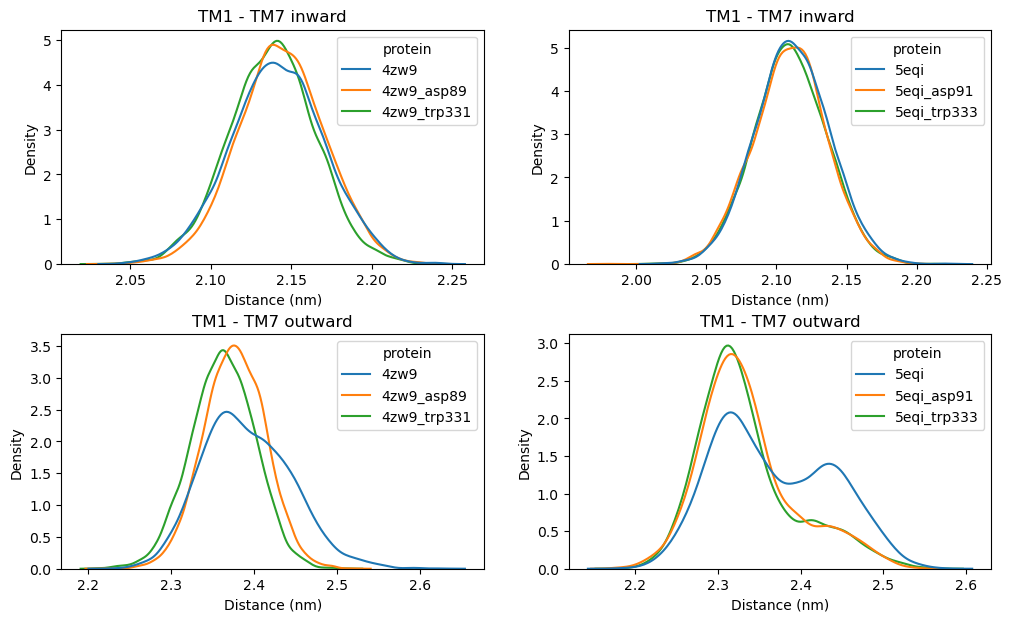

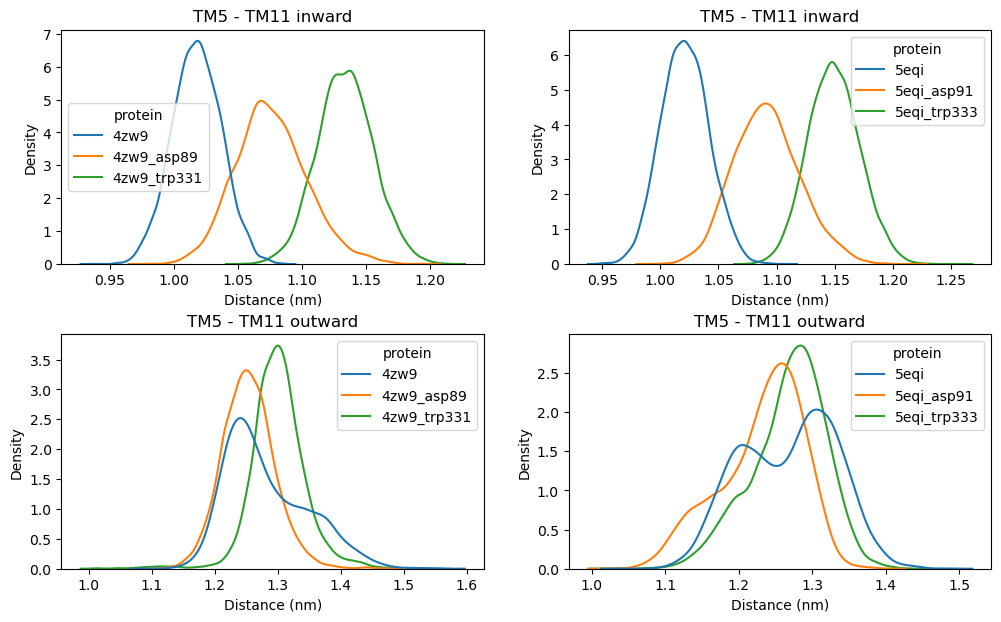

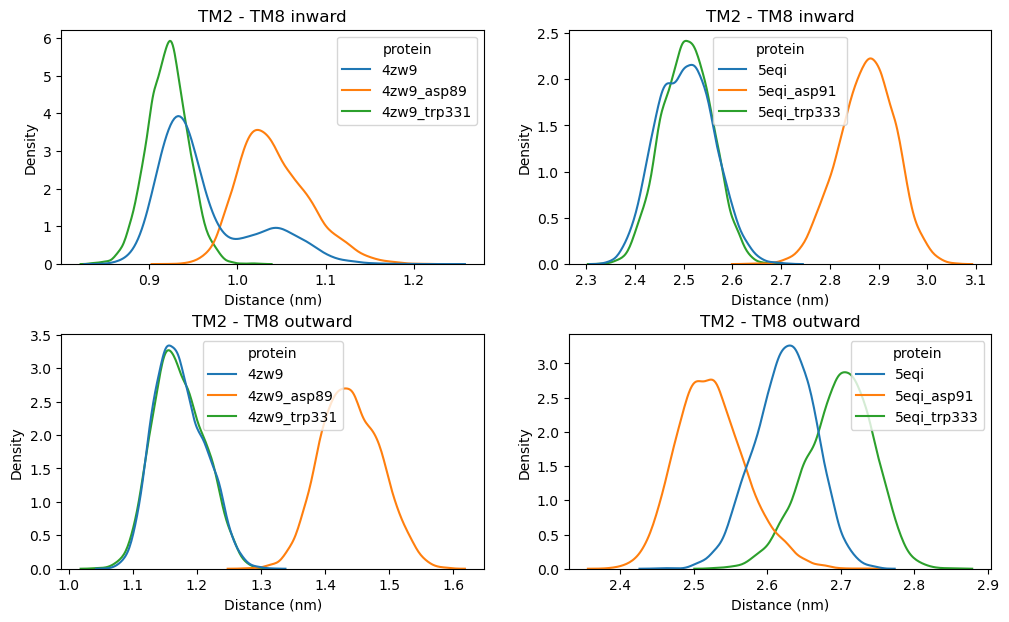

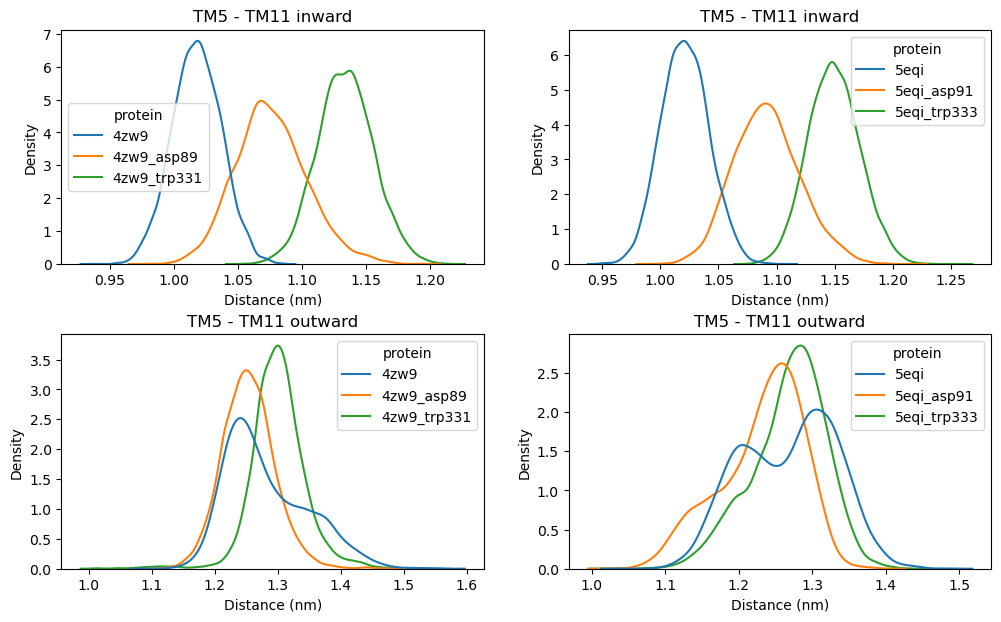

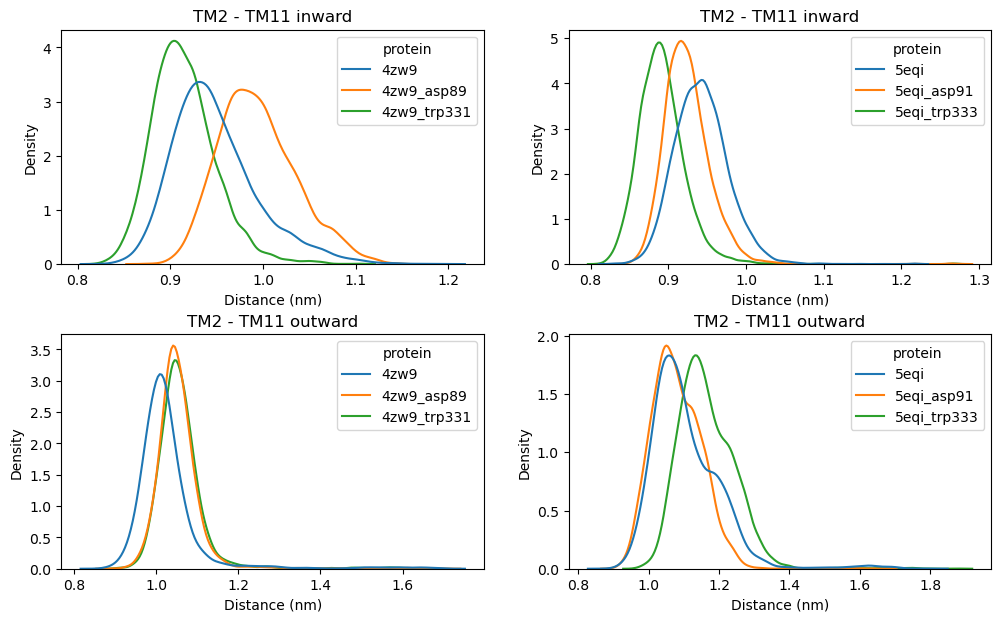

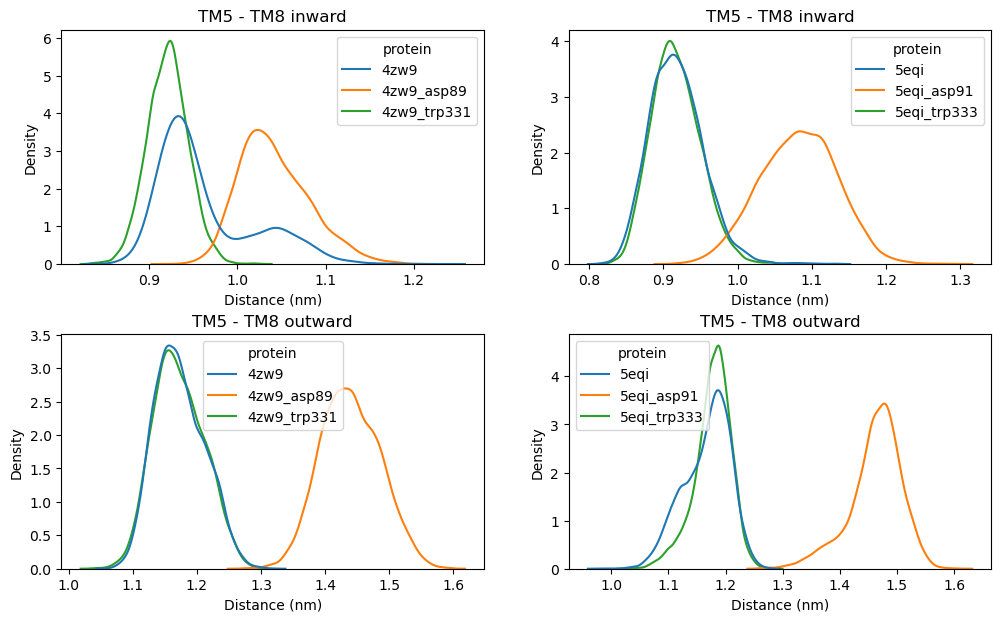

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


for item in ['TM1_TM7', "TM5_TM11", "TM2_TM8", "TM5_TM11", 'TM2_TM11', "TM5_TM8"]:
    plt.rcParams["figure.figsize"] = (12, 7)
    fig, axs = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.2)

    title = (" - ").join(item.split("_"))
    print(title)

    test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
    sns.kdeplot(data=test, x=f"{item}_in", hue="protein", ax=axs[0,0])
    sns.kdeplot(data=test, x=f"{item}_out", hue="protein", ax=axs[1,0])

    test = distance_dataset_df[distance_dataset_df['structure'] == "5eqi"]
    sns.kdeplot(data=test, x=f"{item}_in", hue="protein", ax=axs[0,1])
    sns.kdeplot(data=test, x=f"{item}_out", hue="protein", ax=axs[1,1])

    for item in [(0,0), (1,0), (0,1), (1,1)]:
        axs[item].set_xlabel("Distance (nm)")
        if item[0] == 1:
            axs[item].set_title(f"{title} outward")
        else:
            axs[item].set_title(f"{title} inward")
        # axs[item].set_xlim((0.8, 1.4))


# KDE plots with replicate seperate

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def kde_test(x):
    data = x.iloc[:,-1]
    x_values = np.linspace(min(data), max(data))
    kde = gaussian_kde(data)
    kde_values = kde(x_values)
    return x_values, kde_values

# test = distance_dataset_df[distance_dataset_df['structure'] == "4zw9"]
test = distance_dataset_df


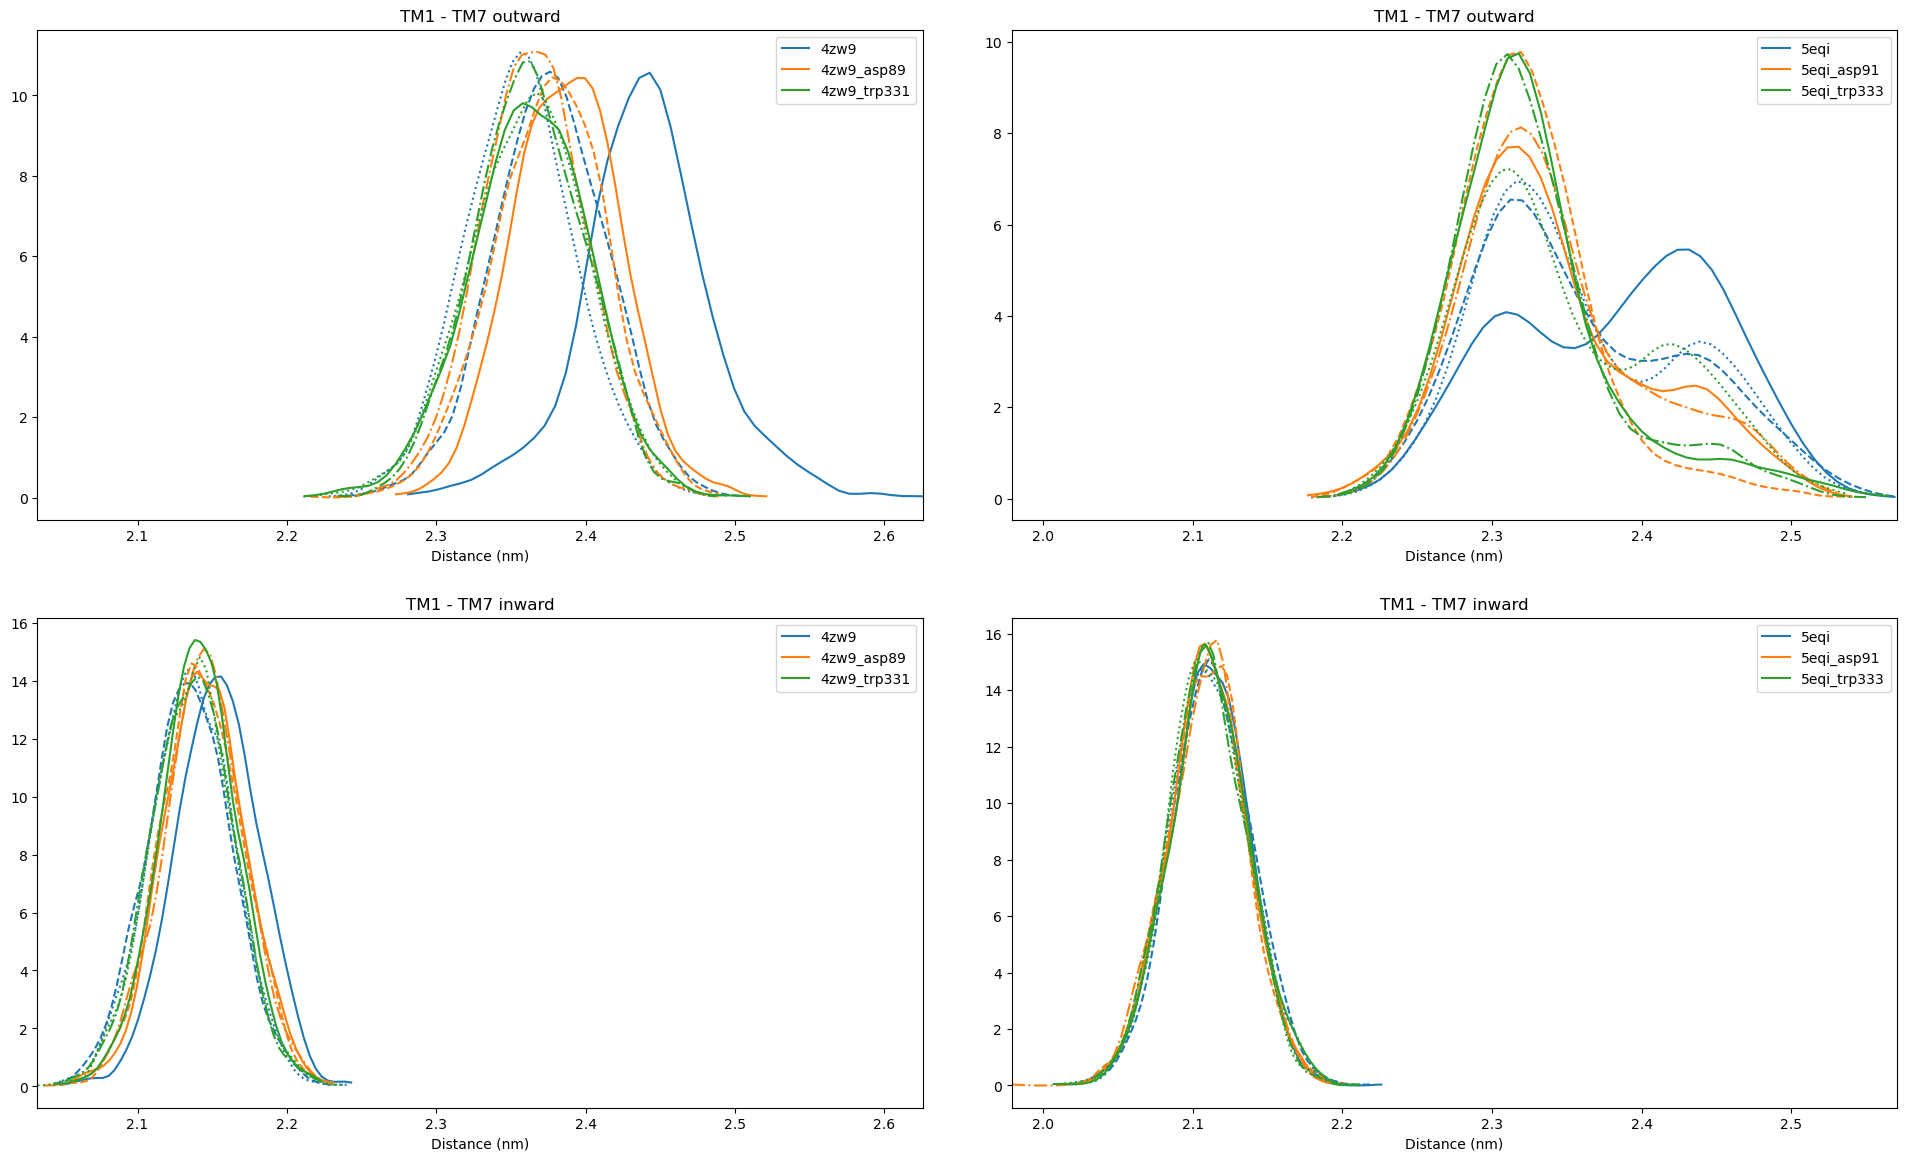

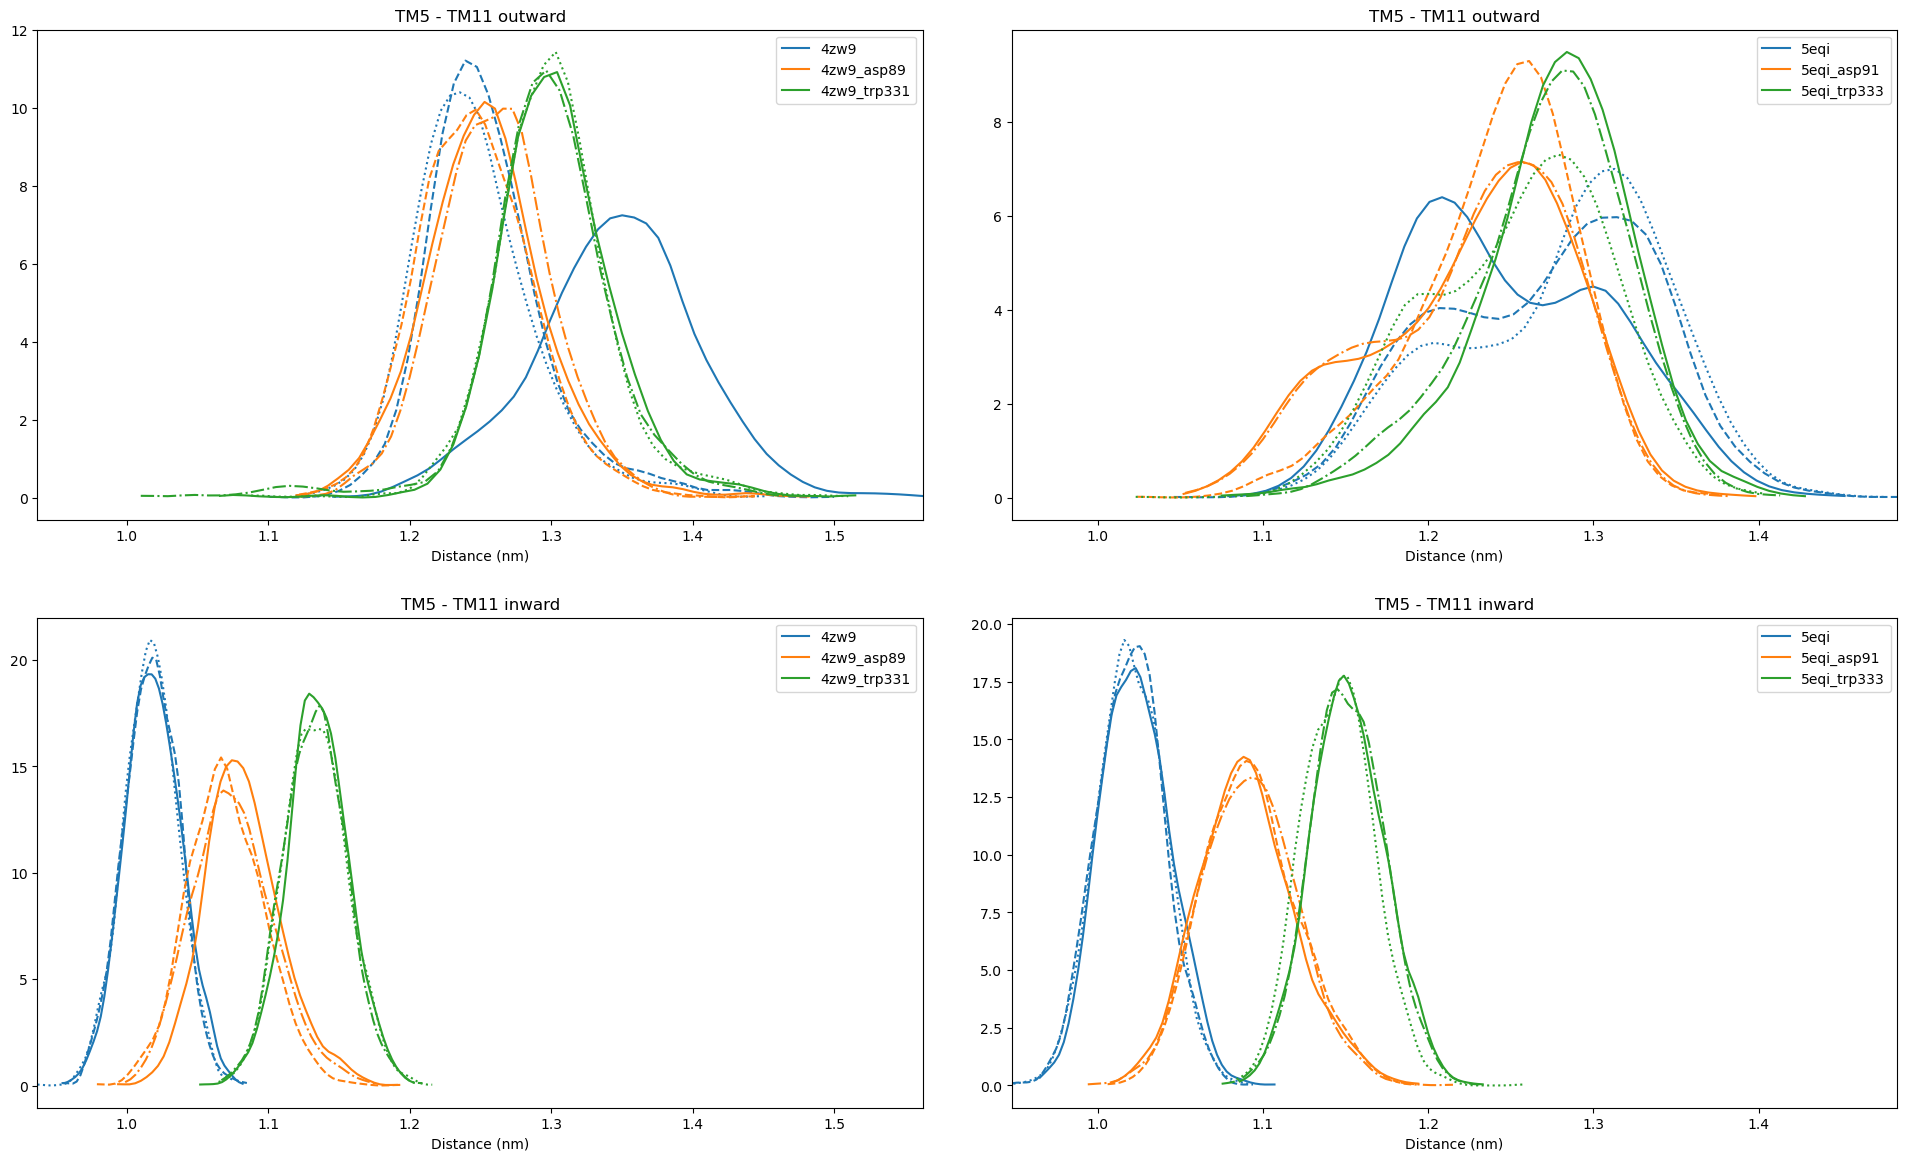

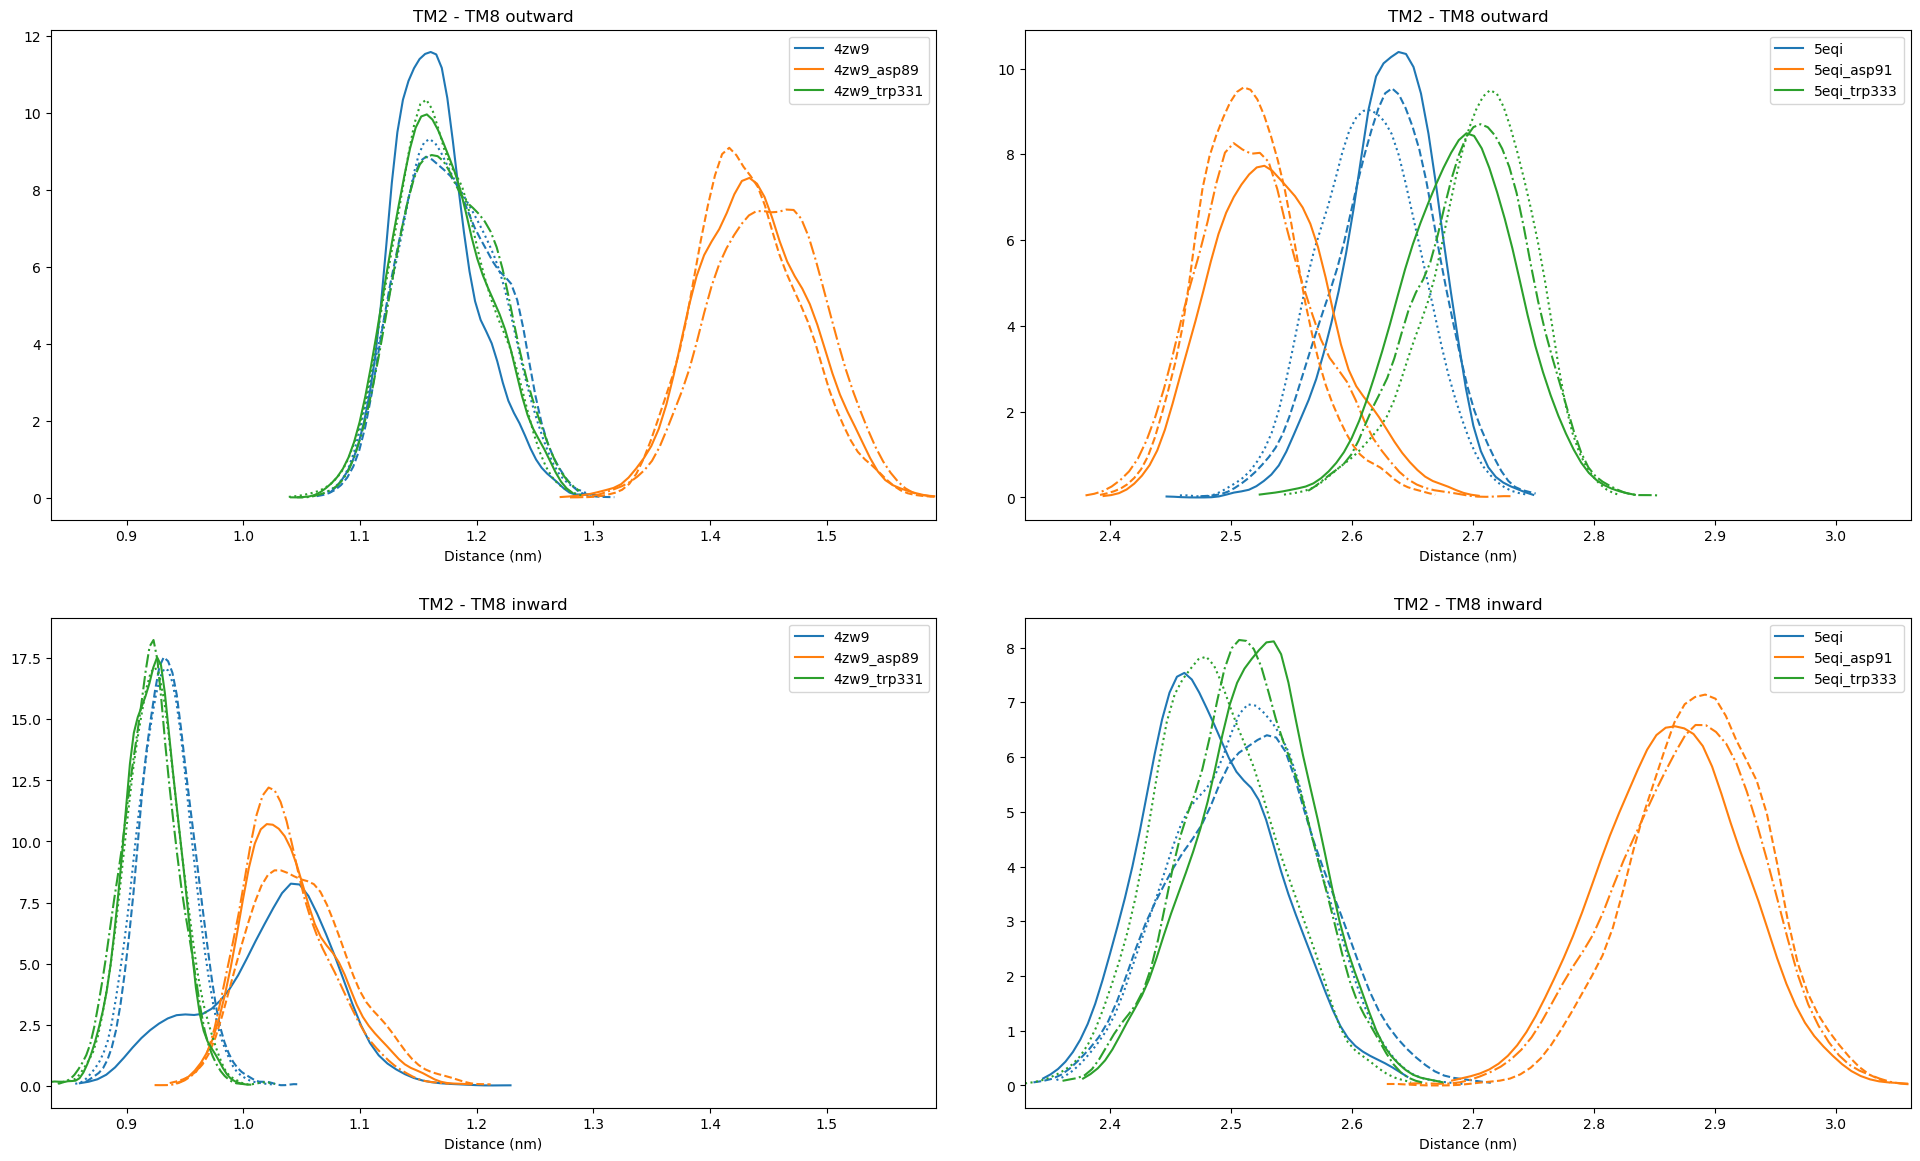

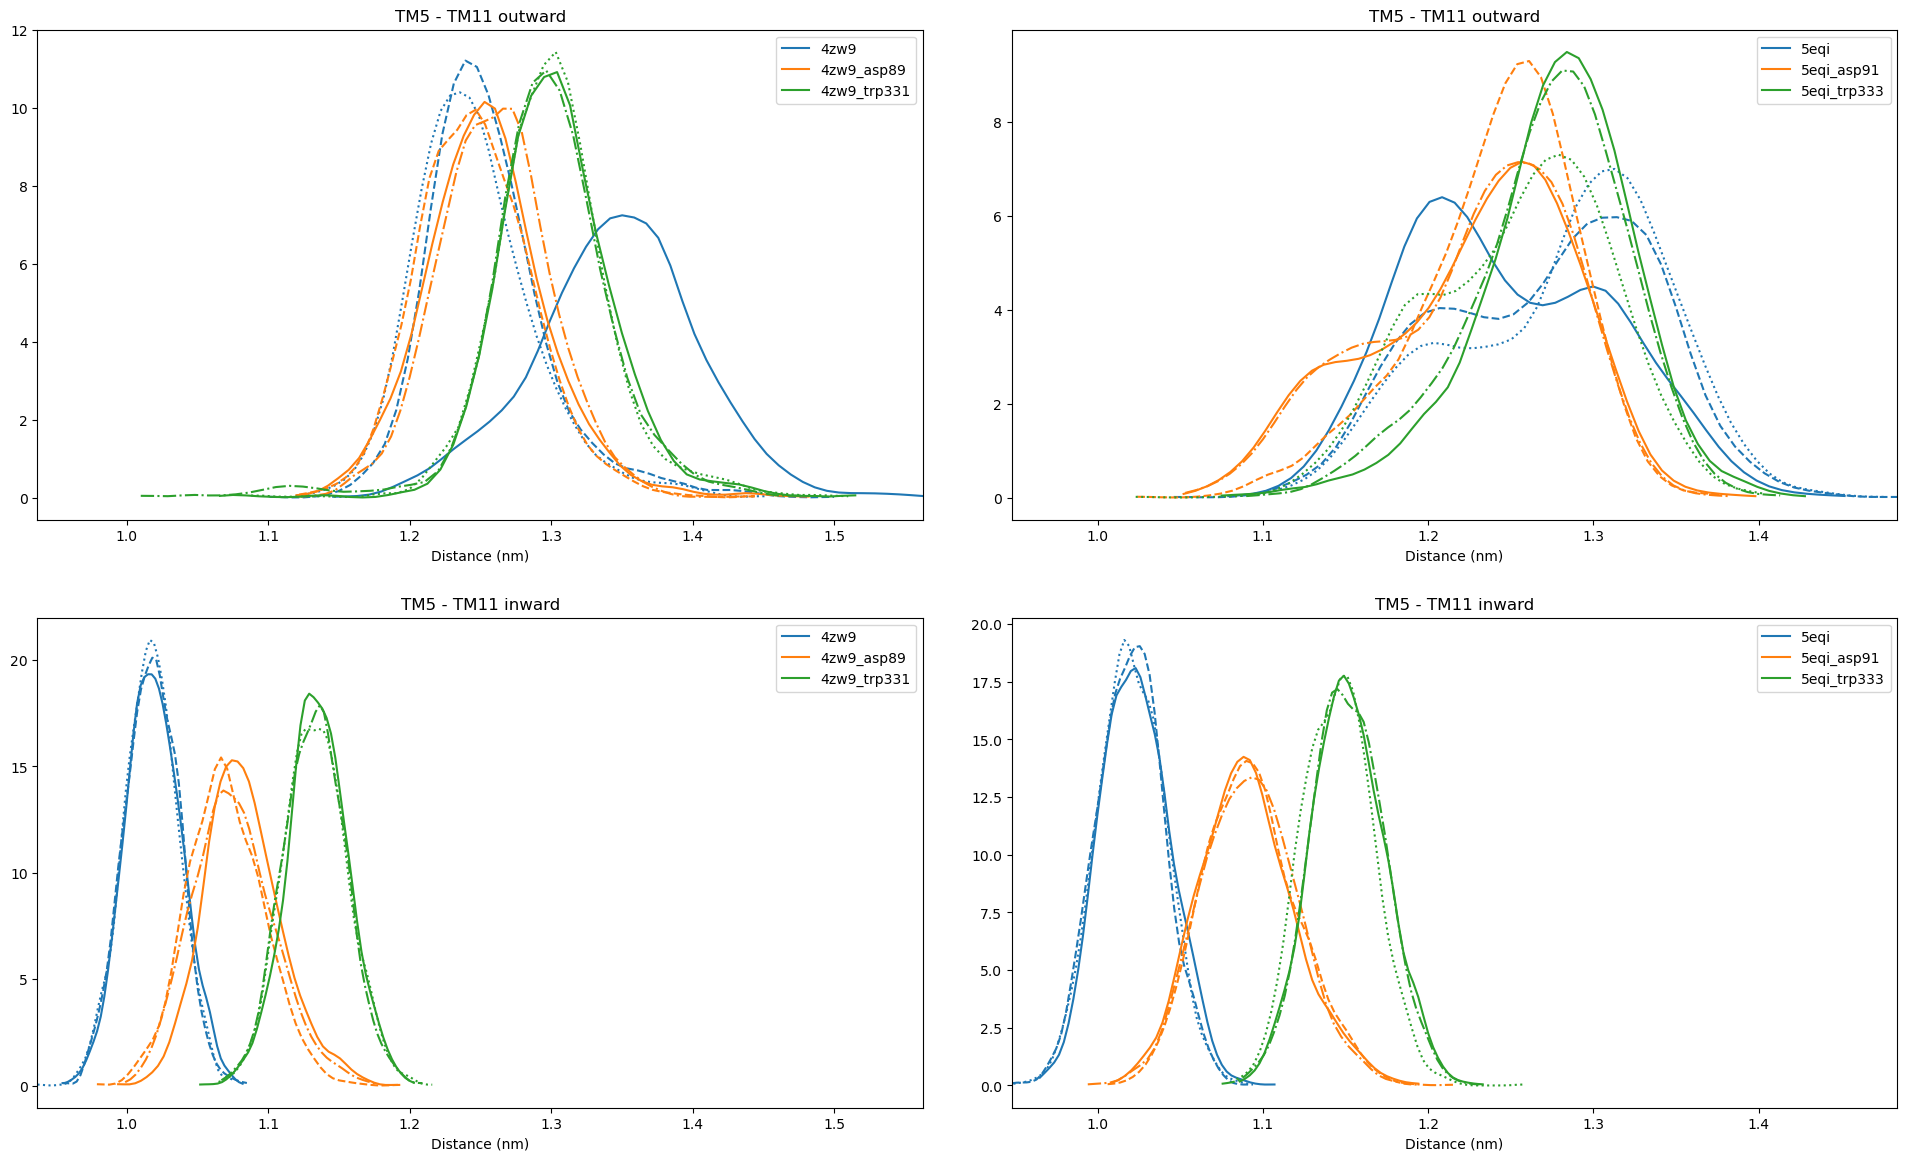

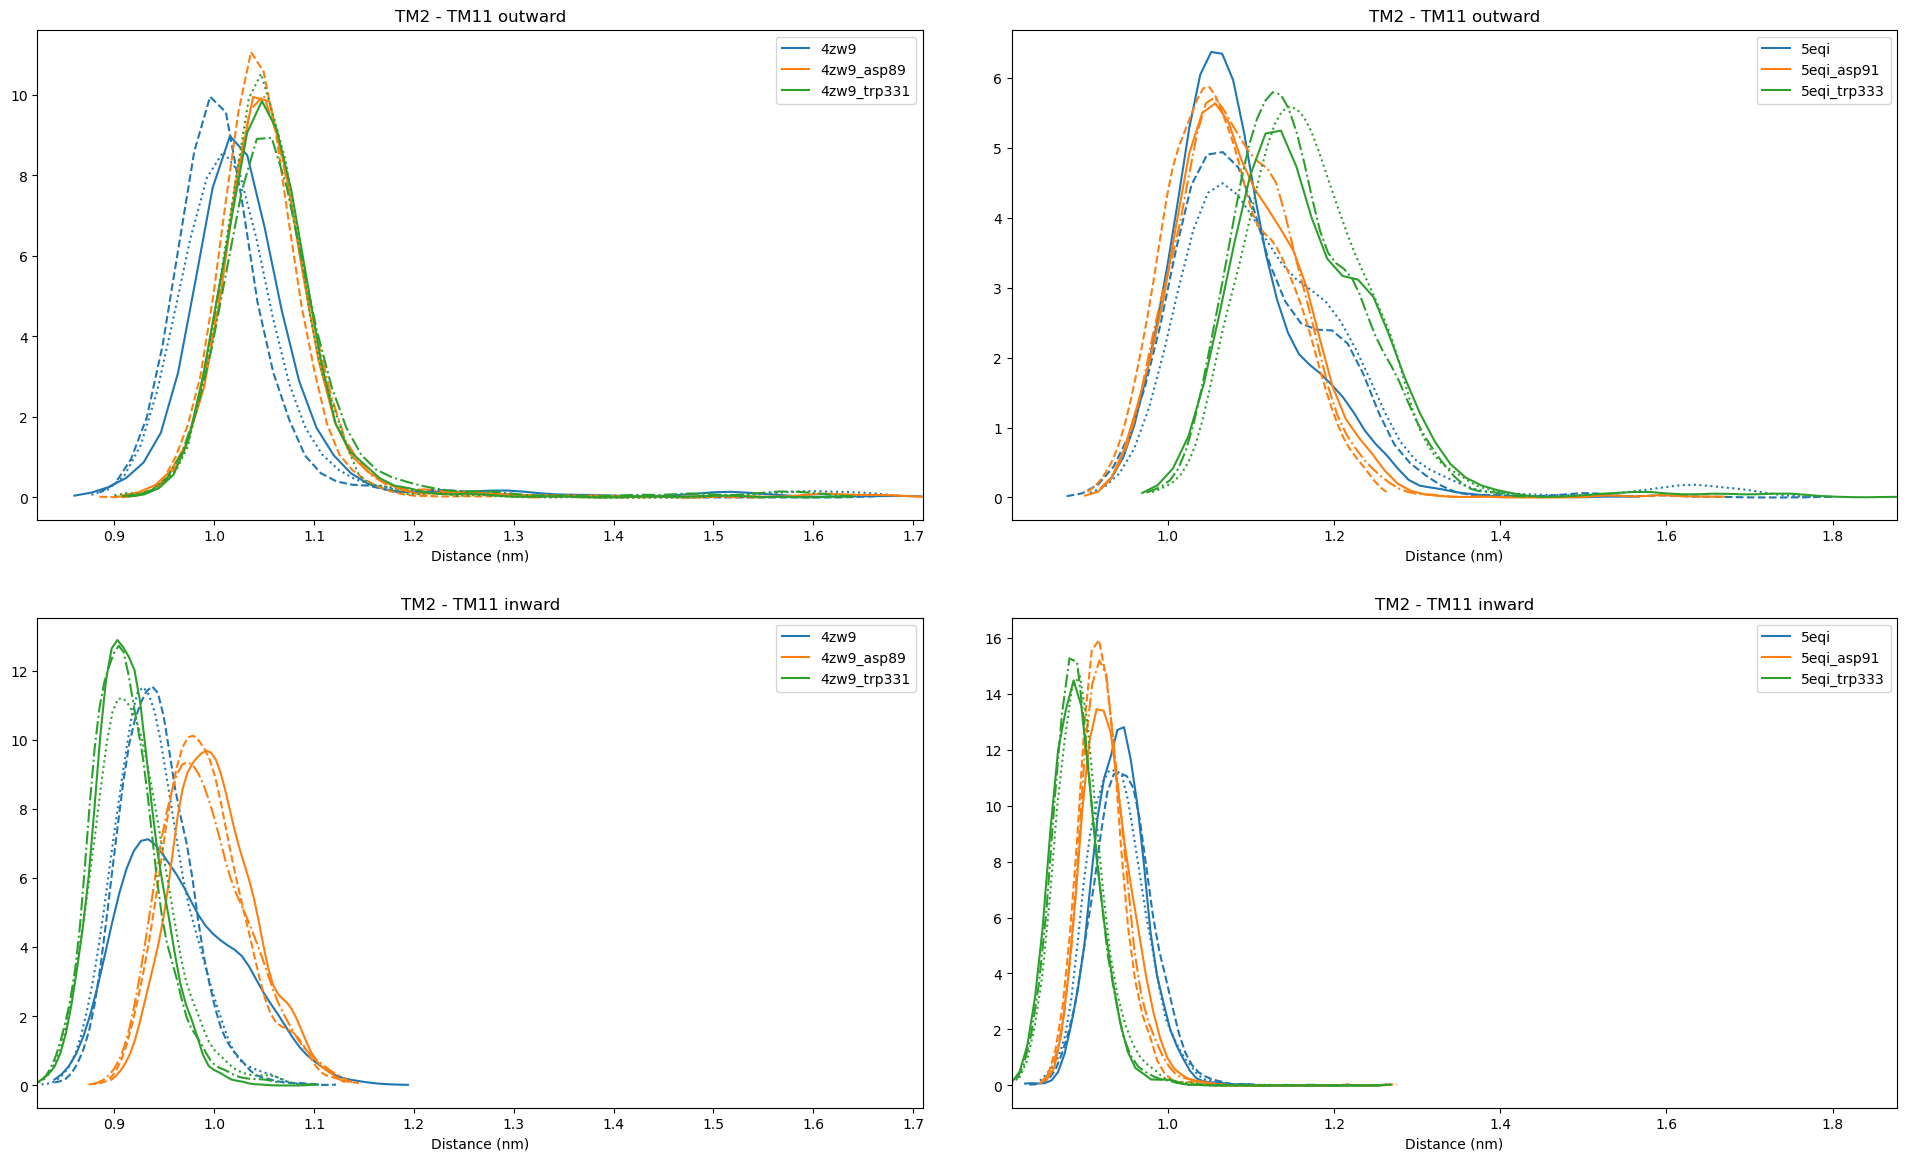

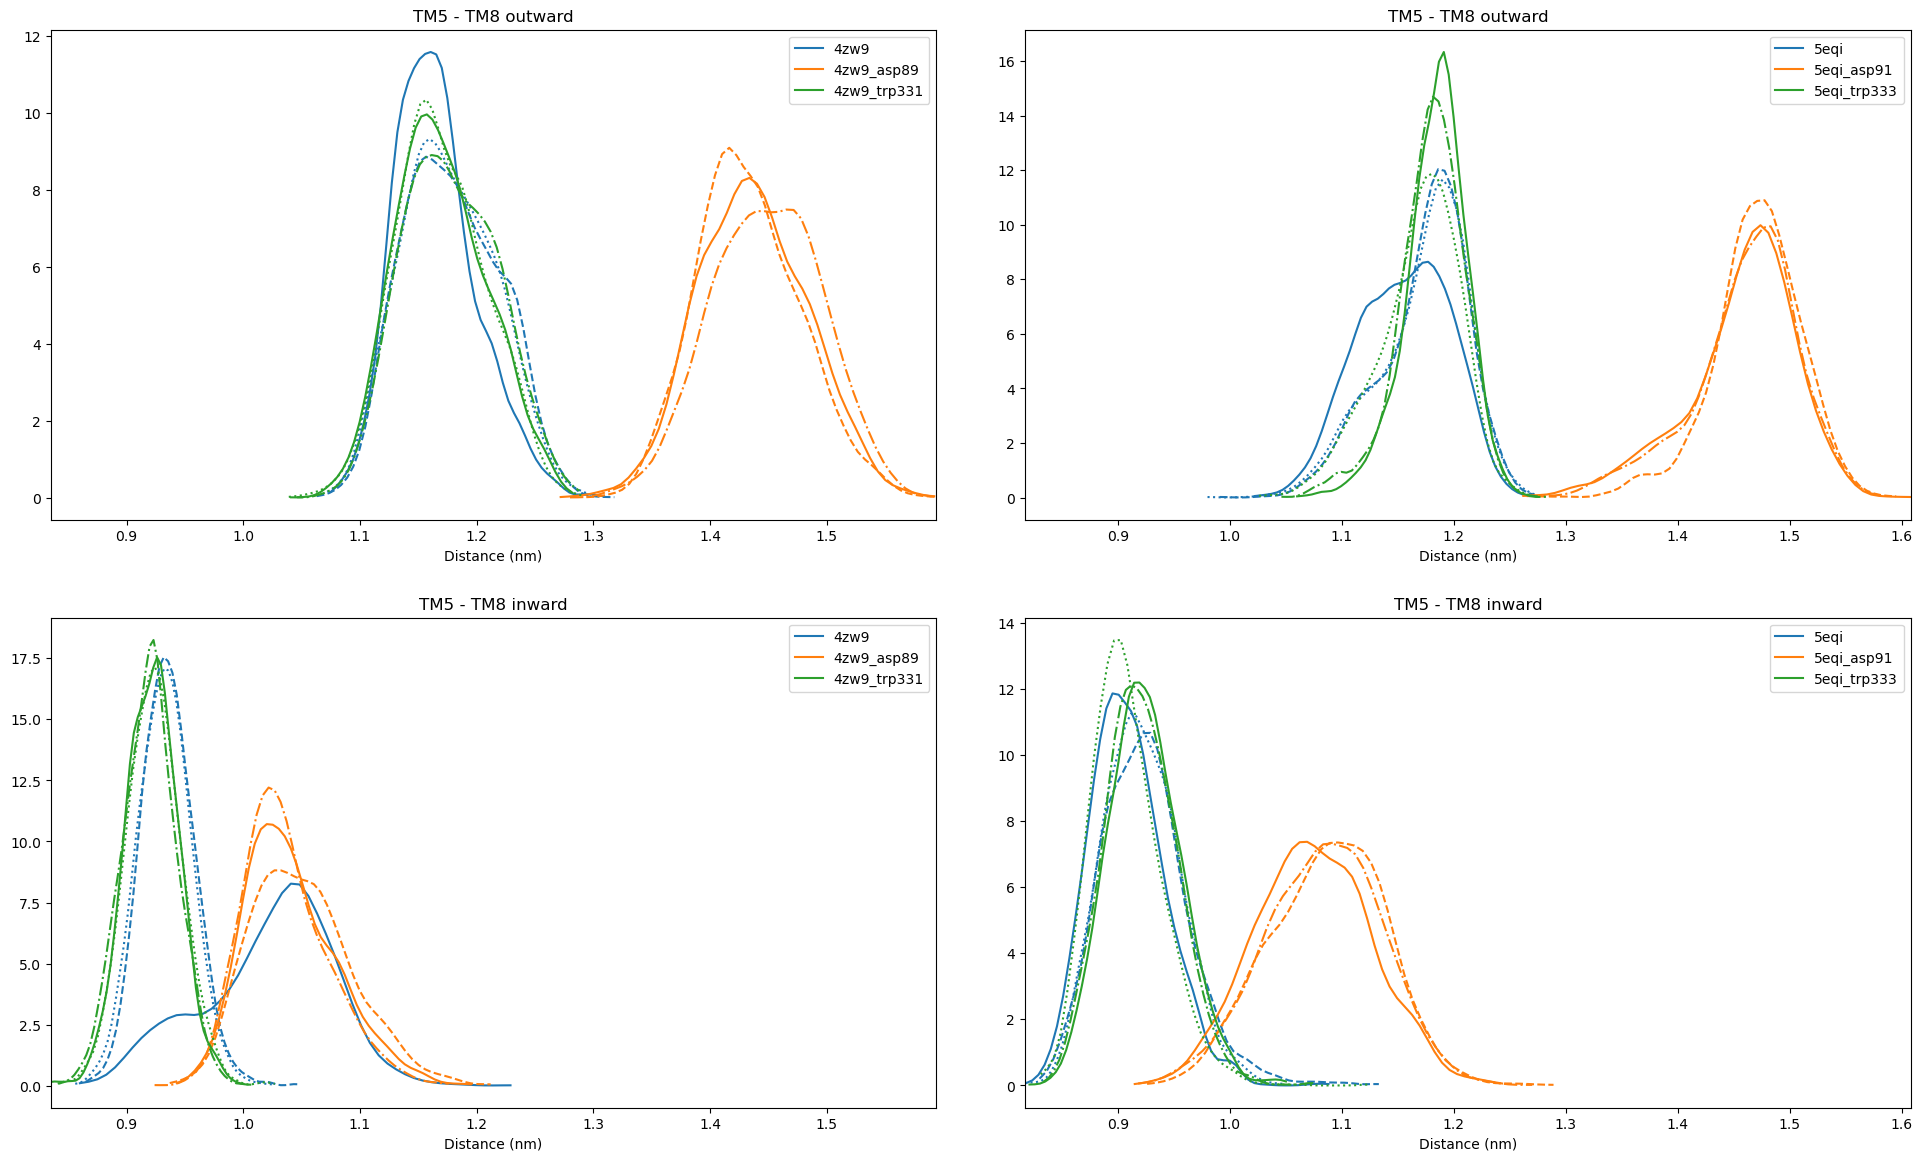

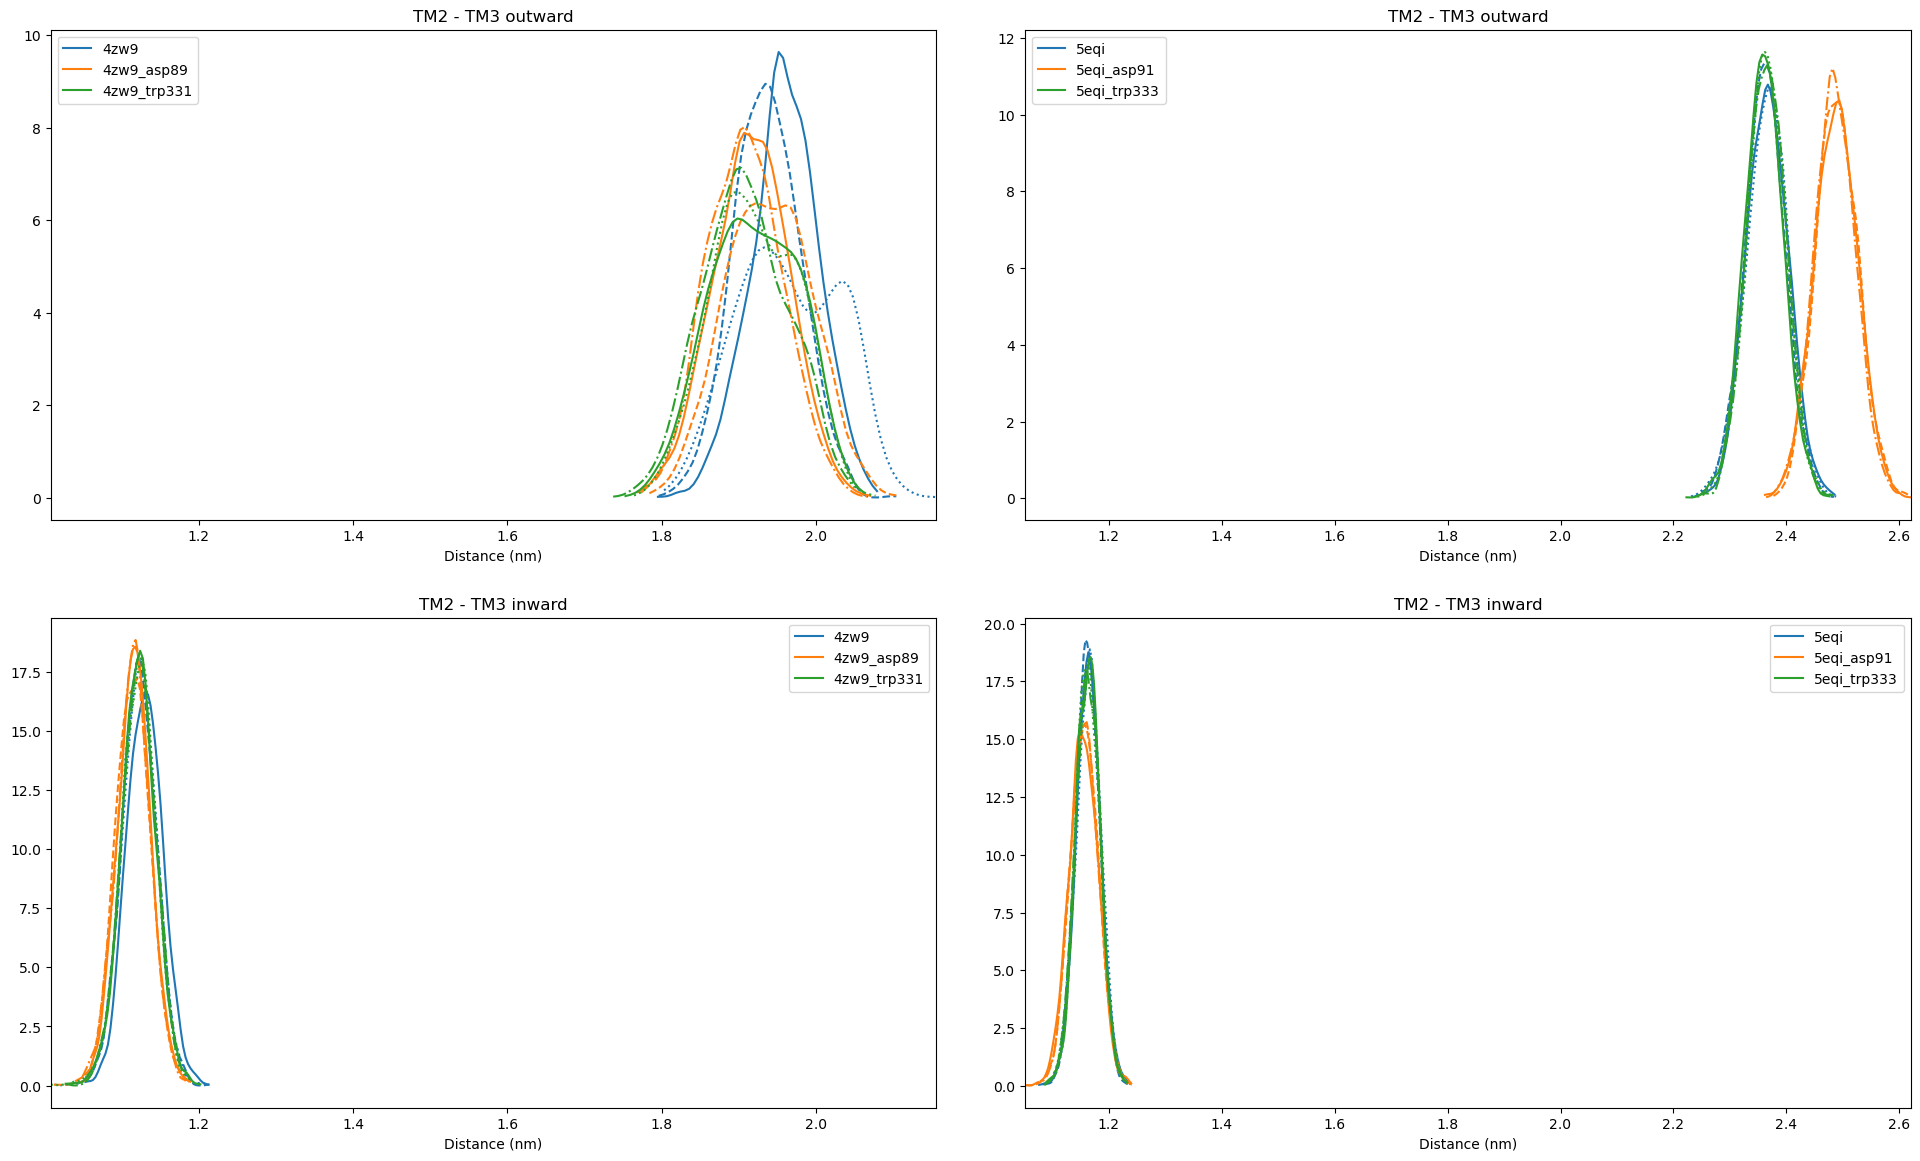

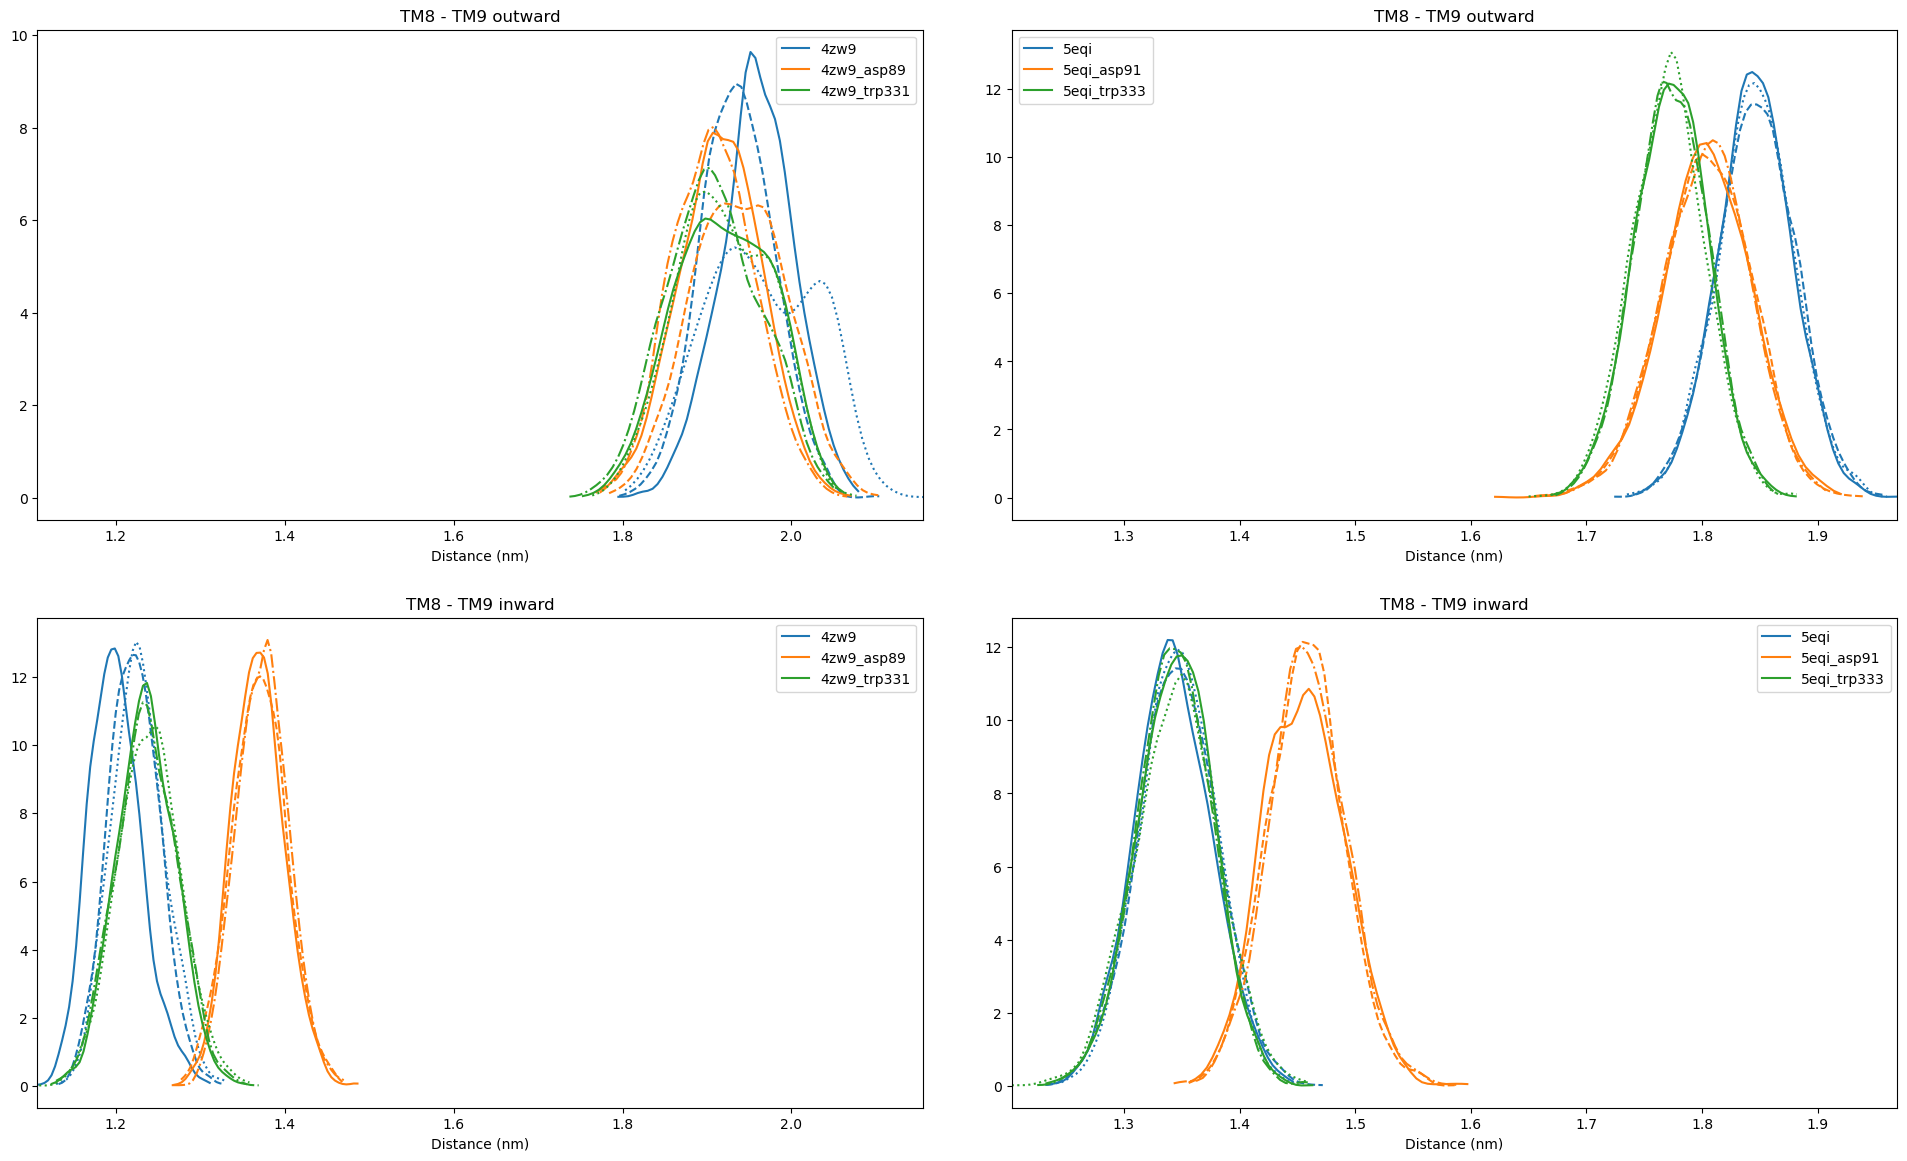

In [170]:
for item in ['TM1_TM7', "TM5_TM11", "TM2_TM8", "TM5_TM11", 'TM2_TM11', "TM5_TM8", "TM2_TM3", "TM8_TM9"]:
    plt.rcParams["figure.figsize"] = (24, 14)
    fig, axs = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.2)
    fig.subplots_adjust(wspace=0.1)

    linestyle=["solid", "dashed", "dotted", "dashdot"]
    title = (" - ").join(item.split("_"))

    ################### 4zw9
    xmin = 100
    xmax = 0
    stylenr = 0
    res = distance_dataset_df[[f"{item}_out", "protein", "rep"]].groupby(["protein", "rep"]).apply(kde_test)
    for protnr, prot in enumerate(["4zw9", "4zw9_asp89", "4zw9_trp331"]):
        for x, y in res[prot]:
            if stylenr == 0:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[0,0], label=prot)
            else:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[0,0])

            stylenr += 1
            if stylenr == 4:
                stylenr = 0
            xmin = min([xmin, min(x)])
            xmax = max([xmax, max(x)])

    stylenr = 0
    res = distance_dataset_df[[f"{item}_in", "protein", "rep"]].groupby(["protein", "rep"]).apply(kde_test)
    for protnr, prot in enumerate(["4zw9", "4zw9_asp89", "4zw9_trp331"]):
        for x, y in res[prot]:
            if stylenr == 0:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[1,0], label=prot)
            else:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[1,0])

            stylenr += 1
            if stylenr == 4:
                stylenr = 0
            xmin = min([xmin, min(x)])
            xmax = max([xmax, max(x)])
    axs[0,0].set_xlim((xmin, xmax))
    axs[1,0].set_xlim((xmin, xmax))

    ################# 5eqi
    xmin = 100
    xmax = 0
    stylenr = 0
    res = distance_dataset_df[[f"{item}_out", "protein", "rep"]].groupby(["protein", "rep"]).apply(kde_test)
    for protnr, prot in enumerate(["5eqi", "5eqi_asp91", "5eqi_trp333"]):
        for x, y in res[prot]:
            if stylenr == 0:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[0,1], label=prot)
            else:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[0,1])

            stylenr += 1
            if stylenr == 4:
                stylenr = 0
            xmin = min([xmin, min(x)])
            xmax = max([xmax, max(x)])

    stylenr = 0
    stylenr = 0
    res = distance_dataset_df[[f"{item}_in", "protein", "rep"]].groupby(["protein", "rep"]).apply(kde_test)
    for protnr, prot in enumerate(["5eqi", "5eqi_asp91", "5eqi_trp333"]):
        for x, y in res[prot]:
            if stylenr == 0:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[1,1], label=prot)
            else:
                sns.lineplot(x=x, y=y, c=sns.color_palette()[protnr], linestyle=linestyle[stylenr], ax=axs[1,1])

            stylenr += 1
            if stylenr == 4:
                stylenr = 0
            xmin = min([xmin, min(x)])
            xmax = max([xmax, max(x)])
    
    #### Tweak axis:
    axs[0,1].set_xlim((xmin, xmax))
    axs[1,1].set_xlim((xmin, xmax))

    for item in [(0,0), (1,0), (0,1), (1,1)]:
        axs[item].set_xlabel("Distance (nm)")
        if item[0] == 1:
            axs[item].set_title(f"{title} inward")
        else:
            axs[item].set_title(f"{title} outward")
